**Digital House - Projeto Integrador - 2021/22**
- Grupo 3: Andréa Pires; Larissa Herbas; Manoel Furtado; Natielli Torres
- Instrutor: Ronisson Lucas Calmon da Conceição e Cláudio Jr.
- Turma: ds_2021_tn06

**Etapas**

| Etapas | Prazo - Entrega |
| :---  | :---  |
| 1) Apresentação do tema| 15/09/21|
|2) Apresentação dos Dados| 29/10/21|
|3) Problematização de Hipóteses e EDA| 29/11/21|
|4) Modelagem | 11/02/22|
|5) Pré-apresentação e Tunning| 23/03/22|
|6) Apresentação Final| 18/04/22|

---

**A desenvolver !!**

<br>
<img src=https://i.imgur.com/GAVB40j.png width="700" />
<br>

<br>
<img src=https://i.imgur.com/GvNMgVY.png width="700" />
<br>

# Etapa 1 - Apresentação do tema

                    **Tema: Desempenho escolar no ENEM: uma análise preditiva para São Paulo-SP**


**Objetivo**
- Prever o desempenho escolar na prova de Matemática e suas tecnologias usando microdados do Exame Nacional do Ensino Médio, para o ano de 2020.

Motivação Teórica: 
1) Predição do desempenho de Matemática e Suas Tecnologias do ENEM. [1]
2) Trabalho: Impacto das variáveis socioeconômicas no desempenho do Enem: uma análise espacial e sociológica. [2]

- [1] Link: http://br-ie.org/pub/index.php/wcbie/article/view/8271
- [2] Link: https://www.scielo.br/j/rap/a/ZHJFnmsrdgGH8cj6xHHwbKg/


------------------------------------

# Etapa 2 - Apresentação dos Dados

Esse trabalho utiliza os microdados do Exame Nacional do Ensino Médio (Enem)[1].


Fonte dos Dados
1. INEP: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados

In [2]:
# Caminho das Funções no OS
import os 
import sys
sys.path.append(os.getcwd())

# Bancos de Dados
import sqlite3
import random

# Manipulação dos Dados
import pandas as pd
import numpy as np
from functions.data_manipulation import *

# Outros
from tqdm import tqdm #Barra de progresso

# warnings
import warnings
warnings.filterwarnings('ignore')

# set some options in pandas
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_info_columns', 200)
pd.set_option('display.max_info_rows', 200)
pd.set_option('display.max_rows', 200)
pd.set_option('display.width', 200)

In [3]:
# Visalização de Dados
import seaborn as sns
import matplotlib.pyplot as plt
from functions.data_visualization import *
%matplotlib inline

# coordenadas geográficas
import geopandas as gpd
import geobr

# Outros
from math import sqrt

## Carregando os dados:
- Criando o Banco de Dados

In [3]:
# Abrindo o Banco de dados.
db_name = 'enem'
db = sqlite3.connect(f'{db_name}.db')

In [ ]:
# Carregando os dados.

# 2020 a 2016 sep = ';'
df_chunks = pd.read_csv('Enem\dados\MICRODADOS_ENEM_2016.csv', encoding = "iso-8859-1", sep = ';', chunksize = 500000)

# 2015 sep = ','
#df_chunks = pd.read_csv('Enem\dados\MICRODADOS_ENEM_2015.csv', encoding = "iso-8859-1", sep = ',', chunksize = 500000)

for df in df_chunks:
    df.to_sql(
        name = 'enem_2020',    # Define o nome da tabela a receber as informações (ou ser criada) 
        index = False,         # Não escreve o índice do dataframe na tabela
        if_exists = 'append',  # Se a tabela já existir, adiciona as informações abaixo das existentes
        con = db               # Define em qual banco os dados serão inseridos
    )

In [6]:
pd.read_sql_query('select * from sqlite_master', db)

,type,name,tbl_name,rootpage,sql
0,table,enem_2020,enem_2020,2,"CREATE TABLE ""enem_2020"" (\n""NU_INSCRICAO"" INT..."
1,table,enem_2019,enem_2019,499496,"CREATE TABLE ""enem_2019"" (\n""NU_INSCRICAO"" INT..."
2,table,enem_2018,enem_2018,1243036,"CREATE TABLE ""enem_2018"" (\n""NU_INSCRICAO"" INT..."
3,table,enem_2017,enem_2017,2038081,"CREATE TABLE ""enem_2017"" (\n""NU_INSCRICAO"" INT..."
4,table,enem_2016,enem_2016,2968218,"CREATE TABLE ""enem_2016"" (\n""NU_INSCRICAO"" INT..."
5,table,enem_2015,enem_2015,4298486,"CREATE TABLE ""enem_2015"" (\n""NU_INSCRICAO"" INT..."


In [7]:
#Verificando tabelas 
query = """
    SELECT name 
    FROM sqlite_master
    WHERE type='table'
"""
name_tables = pd.read_sql_query(query, db)
name_tables

,name
0,enem_2020
1,enem_2019
2,enem_2018
3,enem_2017
4,enem_2016
5,enem_2015


In [8]:
query = """
    SELECT * 
    FROM enem_2019
    LIMIT 5;
"""
enem_2019 = pd.read_sql_query(query, db)
enem_2019.head(2)
#enem_2019 = reduce_mem_usage(pd.read_sql_query(query,db))

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001595656,2019,3552205,Sorocaba,35,SP,36.0,M,1,3,1,2914802.0,Itabuna,29.0,BA,1,11,1,NaN,0,None,None,None,None,None,None,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3552205,Sorocaba,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,0,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,2,A,A,B,C,A,A,B,A,A,A,A,A,A,A,A,A,C,A,C,B
1,190001421546,2019,2910800,Feira de Santana,29,BA,23.0,M,1,1,1,2910800.0,Feira de Santana,29.0,BA,1,5,1,1.0,0,None,None,None,None,None,None,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2910800,Feira de Santana,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,0,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,E,B,B,4,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,E,A,A,B


In [ ]:
enem_2019.shape

In [ ]:
# vamos ler apenas colunas específicas?
query = """
    SELECT NU_ANO, TP_SEXO, TP_ESTADO_CIVIL, TP_COR_RACA, NU_IDADE,
           NO_MUNICIPIO_PROVA, SG_UF_PROVA,
           NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_LC, NU_NOTA_MT,
           NU_NOTA_REDACAO, IN_TREINEIRO,
           Q001, Q002, Q003, Q004, Q005, Q006, Q007, Q008,
           Q009, Q010, Q011, Q012, Q013, Q014, Q015, Q016, 
           Q017, Q018, Q019, Q020, Q021, Q022, Q023, Q024, Q025
    FROM enem_2020
"""

#enem_2020 = pd.read_sql_query(query,db)
#enem_2020 = reduce_mem_usage(pd.read_sql_query(query,db))

In [204]:
#Carregando os dados
#enem_19_Full = reduce_mem_usage(pd.read_csv('Enem\dados\MICRODADOS_ENEM_2019.csv', encoding = "iso-8859-1", sep = ';'))
enem_19_Full = pd.read_csv('Enem\dados\MICRODADOS_ENEM_2019.csv', encoding = "iso-8859-1", sep = ';')

## Limpando os dados:
- Renomeando Colunas
- Removendo quem é treineiro.
- Removendo quem zerou alguma prova.
- Removendo quem faltou alguma prova.
- Definindo uma coluna de média das provas.
- Removendo coluna não usadas

In [205]:
enem_19_Full['Falta'] = (enem_19_Full['TP_PRESENCA_LC'] == 0) | (enem_19_Full['TP_PRESENCA_CN'] == 0)
enem_19_Full['Falta'] = enem_19_Full.Falta.apply(lambda x: 1 if x is True else 0)
round(enem_19_Full.Falta.value_counts(normalize=True)*100,2)

0    72.7
1    27.3
Name: Falta, dtype: float64

In [206]:
# Eliminando aunos que faltaram algum algum dia de prova. 0 --> Faltou Provas, 2 --> Eliminado da Prova
print(enem_19_Full.shape)

Presenca = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT']

for prova in Presenca:
    condicao = enem_19_Full.loc[(enem_19_Full[prova] == 0)].index
    enem_19_Full.drop(condicao, inplace = True)
    condicao = enem_19_Full.loc[(enem_19_Full[prova] == 2)].index
    enem_19_Full.drop(condicao, inplace = True)
    
print(enem_19_Full.shape)

(5095270, 137)
(3702008, 137)


In [207]:
#enem_19_Full['TP_PRESENCA_CN'].unique

In [208]:
# Elimiando os treineiros: 1 --> Sim; 0 --> Não
print(enem_19_Full.shape)
condicao = enem_19_Full.loc[(enem_19_Full['IN_TREINEIRO'] == 1)].index
enem_19_Full.drop(condicao, inplace = True)
print(enem_19_Full.shape)

(3702008, 137)
(3174309, 137)


In [209]:
# Só iremos analisar aluno com notas.
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
print(enem_19_Full.shape)
enem_19_Full.dropna(how = 'any', subset = provas, inplace = True)
print(enem_19_Full.shape)

(3174309, 137)
(3174308, 137)


In [210]:
# Remove quem tirou nota 0 em alguma das provas
print(enem_19_Full.shape)
for prova in provas[:-1]:
    condicao = enem_19_Full.loc[(enem_19_Full[prova]==0)].index
    enem_19_Full.drop(condicao, inplace = True)
print(enem_19_Full.shape)

(3174308, 137)
(3171617, 137)


In [211]:
# Não iremos analisar alunos que solicitaram alguns recursos especializados
# Eliminando esses alunos 
Recursos_Recusados = ['IN_BRAILLE', 'IN_AMPLIADA_24', 'IN_AMPLIADA_18', 'IN_LEDOR', 'IN_ACESSO', 
                      'IN_MATERIAL_ESPECIFICO', 'IN_TRANSCRICAO', 'IN_LIBRAS', 'IN_LEITURA_LABIAL', 
                      'IN_MESA_CADEIRA_RODAS', 'IN_MESA_CADEIRA_SEPARADA', 'IN_APOIO_PERNA', 'IN_GUIA_INTERPRETE', 
                      'IN_COMPUTADOR', 'IN_CADEIRA_ESPECIAL','IN_CADEIRA_ACOLCHOADA', 'IN_PROVA_DEITADO', 
                      'IN_MOBILIARIO_OBESO', 'IN_LAMINA_OVERLAY', 'IN_PROTETOR_AURICULAR', 'IN_MAQUINA_BRAILE', 
                      'IN_SOROBAN', 'IN_SONDA', 'IN_SALA_INDIVIDUAL', 'IN_SALA_ESPECIAL', 'IN_SALA_ACOMPANHANTE', 
                      'IN_MOBILIARIO_ESPECIFICO', 'IN_GESTANTE', 'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
                      'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
                      'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL', 'IN_DISCALCULIA', 'IN_AUTISMO', 
                      'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF']

# Solicitação aceita na análise
Recursos_Aceitos = ['IN_CADEIRA_CANHOTO', 'IN_MARCA_PASSO', 'IN_MEDICAMENTOS', 'IN_NOME_SOCIAL', 
                    'IN_MEDIDOR_GLICOSE', 'IN_DEFICIT_ATENCAO', 'IN_TEMPO_ADICIONAL', 'IN_DISLEXIA']

#1 --> Solicitou Sim; 0 --> Não Solicitou
print(enem_19_Full.shape)
for recurso in Recursos_Recusados:
    condicao = enem_19_Full.loc[(enem_19_Full[recurso] == 1)].index
    enem_19_Full.drop(condicao, inplace = True)
print(enem_19_Full.shape)

(3171617, 137)
(3152113, 137)


In [212]:
# Elinado Colunas não usadas em recursos solictados:
# Acreditamos que inculir essas colunas na coluna iria enviesar a análise.

enem_19_Full.drop(Recursos_Recusados, axis=1, inplace = True)

# Elinado Colunas não usadas:
Col_Nao_Usadas_1 = ['CO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'CO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO',
                    'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'CO_UF_ESC', 'CO_ESCOLA', 'CO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'TP_PRESENCA_CN', 
                    'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'Falta', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
                    'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT',
                    'IN_CADEIRA_CANHOTO', 'IN_MARCA_PASSO', 'IN_MEDICAMENTOS', 'IN_NOME_SOCIAL', 'IN_MEDIDOR_GLICOSE', 'IN_DISLEXIA',
                    'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'TP_ENSINO', 'NO_MUNICIPIO_ESC',
                    'SG_UF_ESC','TP_DEPENDENCIA_ADM_ESC','TP_LOCALIZACAO_ESC','TP_SIT_FUNC_ESC', 'TP_STATUS_REDACAO',
                    'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
                    'IN_DEFICIT_ATENCAO', 'IN_SEM_RECURSO', 'IN_TEMPO_ADICIONAL']

enem_19_Full.drop(Col_Nao_Usadas_1, axis=1, inplace = True)  

print(enem_19_Full.shape)

(3152113, 47)


In [213]:
# Não entrou nas variáveis esplicativas para os modelos utilizado no Machine learning
#Col_Eliminar_2 = ['IN_CADEIRA_CANHOTO', 'IN_MARCA_PASSO', 'IN_MEDICAMENTOS', 'IN_NOME_SOCIAL', 'IN_MEDIDOR_GLICOSE']

In [214]:
# Restrição Espacial - Selecionado Local da Prova Estado de SP
# Lista UF
UF = ['RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL',
      'SE', 'BA', 'MG', 'ES', 'RJ', 'PR', 'SC', 'RS', 'MS', 'MT', 'GO', 'DF']

print(enem_19_Full.shape)
for uf in UF:
    condicao = enem_19_Full.loc[(enem_19_Full['SG_UF_PROVA'] == uf)].index
    enem_19_Full.drop(condicao, inplace = True)
print(enem_19_Full.shape)
enem_19_Full.head()

(3152113, 47)
(498188, 47)


,NU_INSCRICAO,NU_ANO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,NO_MUNICIPIO_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,NO_MUNICIPIO_PROVA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
9,190001592266,2019,São Paulo,SP,17.0,M,1,1,1,São Paulo,SP,2,0,2,São Paulo,SP,543.9,548.1,502.5,480.7,0,400.0,E,E,B,B,5,F,A,B,C,B,A,B,B,B,A,B,A,A,B,A,B,C,B,B,B
31,190001595660,2019,Itaquaquecetuba,SP,17.0,F,1,2,1,São Paulo,SP,2,0,2,Itaquaquecetuba,SP,371.8,501.4,518.6,442.0,1,660.0,E,F,B,D,3,B,A,B,C,A,A,B,B,A,A,A,A,A,A,A,A,D,A,A,B
39,190001595662,2019,Taboão da Serra,SP,22.0,F,1,2,1,Taboão da Serra,SP,4,0,1,Taboão da Serra,SP,478.1,455.7,530.5,432.1,0,300.0,C,D,C,B,3,B,A,B,A,A,B,B,A,A,A,A,A,A,B,A,A,C,A,A,A
63,190001595665,2019,Diadema,SP,19.0,F,1,1,1,Diadema,SP,1,2,1,Diadema,SP,587.9,595.9,563.7,533.6,0,620.0,G,E,D,D,4,G,A,B,C,B,A,B,B,B,A,A,A,A,C,A,A,D,A,B,B
69,190001595666,2019,Itapevi,SP,24.0,F,1,1,1,Cotia,SP,1,7,1,Itapevi,SP,472.7,590.1,563.4,444.8,0,760.0,E,F,D,D,3,D,A,B,C,B,A,B,B,B,A,B,A,A,C,B,A,D,A,A,B


In [215]:
# Define coluna de médias
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
enem_19_Full['Média_Geral'] = enem_19_Full[provas].mean(axis = 1)
enem_19_Full.reset_index(drop=True,inplace=True)

In [216]:
print(enem_19_Full.shape)
enem_19_Full.head()

(498188, 48)


,NU_INSCRICAO,NU_ANO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,NO_MUNICIPIO_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,NO_MUNICIPIO_PROVA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Média_Geral
0,190001592266,2019,São Paulo,SP,17.0,M,1,1,1,São Paulo,SP,2,0,2,São Paulo,SP,543.9,548.1,502.5,480.7,0,400.0,E,E,B,B,5,F,A,B,C,B,A,B,B,B,A,B,A,A,B,A,B,C,B,B,B,495.04
1,190001595660,2019,Itaquaquecetuba,SP,17.0,F,1,2,1,São Paulo,SP,2,0,2,Itaquaquecetuba,SP,371.8,501.4,518.6,442.0,1,660.0,E,F,B,D,3,B,A,B,C,A,A,B,B,A,A,A,A,A,A,A,A,D,A,A,B,498.76
2,190001595662,2019,Taboão da Serra,SP,22.0,F,1,2,1,Taboão da Serra,SP,4,0,1,Taboão da Serra,SP,478.1,455.7,530.5,432.1,0,300.0,C,D,C,B,3,B,A,B,A,A,B,B,A,A,A,A,A,A,B,A,A,C,A,A,A,439.28
3,190001595665,2019,Diadema,SP,19.0,F,1,1,1,Diadema,SP,1,2,1,Diadema,SP,587.9,595.9,563.7,533.6,0,620.0,G,E,D,D,4,G,A,B,C,B,A,B,B,B,A,A,A,A,C,A,A,D,A,B,B,580.22
4,190001595666,2019,Itapevi,SP,24.0,F,1,1,1,Cotia,SP,1,7,1,Itapevi,SP,472.7,590.1,563.4,444.8,0,760.0,E,F,D,D,3,D,A,B,C,B,A,B,B,B,A,B,A,A,C,B,A,D,A,A,B,566.20


In [217]:
check_duplicate_lines(enem_19_Full)

'0 duplicate lines'

In [218]:
check_missing(enem_19_Full)

NO_MUNICIPIO_NASCIMENTO    2.43
SG_UF_NASCIMENTO           2.43
NU_INSCRICAO               0.00
Q015                       0.00
Q006                       0.00
Q007                       0.00
Q008                       0.00
Q009                       0.00
Q010                       0.00
Q011                       0.00
Q012                       0.00
Q013                       0.00
Q014                       0.00
Q017                       0.00
Q016                       0.00
Q004                       0.00
Q018                       0.00
Q019                       0.00
Q020                       0.00
Q021                       0.00
Q022                       0.00
Q023                       0.00
Q024                       0.00
Q025                       0.00
Q005                       0.00
Q003                       0.00
NU_ANO                     0.00
Q002                       0.00
NO_MUNICIPIO_RESIDENCIA    0.00
SG_UF_RESIDENCIA           0.00
NU_IDADE                   0.00
TP_SEXO 

In [219]:
round(enem_19_Full.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
NU_INSCRICAO,498188.0,1.900036e+11,1336204.46,1.900010e+11,1.900023e+11,1.900036e+11,1.900047e+11,1.900061e+11
NU_ANO,498188.0,2.019000e+03,0.00,2.019000e+03,2.019000e+03,2.019000e+03,2.019000e+03,2.019000e+03
NU_IDADE,498177.0,2.057000e+01,6.42,1.200000e+01,1.700000e+01,1.800000e+01,2.100000e+01,9.100000e+01
TP_ESTADO_CIVIL,498188.0,1.050000e+00,0.38,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
TP_COR_RACA,498188.0,1.780000e+00,1.00,0.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00
TP_NACIONALIDADE,498188.0,1.030000e+00,0.23,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
TP_ST_CONCLUSAO,498188.0,1.480000e+00,0.51,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
TP_ANO_CONCLUIU,498188.0,2.210000e+00,3.55,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,1.300000e+01
TP_ESCOLA,498188.0,1.580000e+00,0.68,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
NU_NOTA_CN,498188.0,4.946500e+02,78.56,3.279000e+02,4.330000e+02,4.911000e+02,5.517000e+02,8.609000e+02


In [220]:
# renomeia as colunas do data frame
cols = {
    'NO_MUNICIPIO_RESIDENCIA': 'Município_Residencia', 'NO_MUNICIPIO_PROVA':'Município_Prova',
    'NO_MUNICIPIO_NASCIMENTO': 'Município_Nascimento', 'NO_MUNICIPIO_PROVA':'Município_Prova',
    'SG_UF_RESIDENCIA': 'UF_Residência', 'SG_UF_NASCIMENTO':'UF_Nascimento','SG_UF_PROVA':'UF_Prova',
    'SG_UF_NASCIMENTO':'UF_Nascimento', 'NU_INSCRICAO': 'Inscrição',
    'NU_ANO':'Ano', 'NU_IDADE':'Idade',
    'TP_SEXO':'Gênero', 'TP_ESTADO_CIVIL':'Estado_Civil', 'TP_COR_RACA':'Cor', 'TP_NACIONALIDADE':'Nacionalidade',  
    'TP_ST_CONCLUSAO':'Ensino_Médio_Concluido','TP_ESCOLA':'Tipo_Escola', 'TP_LINGUA':'Lingua_Estrangeira', 'TP_ANO_CONCLUIU':'Ano_Conclusão',
    'NU_NOTA_CN':'Ciências_Natureza', 'NU_NOTA_CH':'Ciências Humanas', 'NU_NOTA_LC':'Linguagem e Códigos',
    'NU_NOTA_MT':'Matemática',        'NU_NOTA_REDACAO':'Redação',
    
    'Q001': 'Escolaridade_pai',     'Q002': 'Escolaridade_mae',      'Q003': 'Ocupacao_pai',            'Q004': 'Ocupacao_mae',
    'Q005': 'Pessoas_residencia',   'Q006': 'Renda_mensal_familiar', 'Q007': 'Empregada_domestica',
    'Q008': 'Quantidade_banheiros', 'Q009': 'Quantidade_quartos',    'Q010': 'Quantidade_carros',       'Q011': 'Quantidade_moto',
    'Q012': 'Geladeira',     'Q013': 'Freezer',       'Q014': 'Maquina_lavar', 'Q015': 'Maquina_secar', 'Q016': 'Microondas',
    'Q017': 'Lava_louca',    'Q018': 'Aspirador_po',  'Q019': 'TV',            'Q020': 'DVD',           'Q021': 'TV_assinatura', 
    'Q022': 'Celular',       'Q023': 'Telefone_fixo', 'Q024': 'Computador',    'Q025': 'Internet',
}
enem_19_Full.rename(columns = cols, inplace = True)

In [221]:
enem_19_Full.head()

,Inscrição,Ano,Município_Residencia,UF_Residência,Idade,Gênero,Estado_Civil,Cor,Nacionalidade,Município_Nascimento,UF_Nascimento,Ensino_Médio_Concluido,Ano_Conclusão,Tipo_Escola,Município_Prova,UF_Prova,Ciências_Natureza,Ciências Humanas,Linguagem e Códigos,Matemática,Lingua_Estrangeira,Redação,Escolaridade_pai,Escolaridade_mae,Ocupacao_pai,Ocupacao_mae,Pessoas_residencia,Renda_mensal_familiar,Empregada_domestica,Quantidade_banheiros,Quantidade_quartos,Quantidade_carros,Quantidade_moto,Geladeira,Freezer,Maquina_lavar,Maquina_secar,Microondas,Lava_louca,Aspirador_po,TV,DVD,TV_assinatura,Celular,Telefone_fixo,Computador,Internet,Média_Geral
0,190001592266,2019,São Paulo,SP,17.0,M,1,1,1,São Paulo,SP,2,0,2,São Paulo,SP,543.9,548.1,502.5,480.7,0,400.0,E,E,B,B,5,F,A,B,C,B,A,B,B,B,A,B,A,A,B,A,B,C,B,B,B,495.04
1,190001595660,2019,Itaquaquecetuba,SP,17.0,F,1,2,1,São Paulo,SP,2,0,2,Itaquaquecetuba,SP,371.8,501.4,518.6,442.0,1,660.0,E,F,B,D,3,B,A,B,C,A,A,B,B,A,A,A,A,A,A,A,A,D,A,A,B,498.76
2,190001595662,2019,Taboão da Serra,SP,22.0,F,1,2,1,Taboão da Serra,SP,4,0,1,Taboão da Serra,SP,478.1,455.7,530.5,432.1,0,300.0,C,D,C,B,3,B,A,B,A,A,B,B,A,A,A,A,A,A,B,A,A,C,A,A,A,439.28
3,190001595665,2019,Diadema,SP,19.0,F,1,1,1,Diadema,SP,1,2,1,Diadema,SP,587.9,595.9,563.7,533.6,0,620.0,G,E,D,D,4,G,A,B,C,B,A,B,B,B,A,A,A,A,C,A,A,D,A,B,B,580.22
4,190001595666,2019,Itapevi,SP,24.0,F,1,1,1,Cotia,SP,1,7,1,Itapevi,SP,472.7,590.1,563.4,444.8,0,760.0,E,F,D,D,3,D,A,B,C,B,A,B,B,B,A,B,A,A,C,B,A,D,A,A,B,566.20


In [222]:
# Exportar para .csv. Sem o index, index=False; 
enem_19_Full.to_csv('enem_19_SP.csv', index=False, encoding = "utf-8")

In [4]:
#Carregando os dados
#enem_19_Full = reduce_mem_usage(pd.read_csv('Enem\dados\MICRODADOS_ENEM_2019.csv', encoding = "iso-8859-1", sep = ';'))
enem_19_SP = pd.read_csv('enem_19_SP.csv', encoding = "utf-8", sep = ',')

In [ ]:
print(enem_2019.shape)
print(enem_2020.shape)

In [ ]:
df_19_20 = pd.concat([enem_2019, enem_2020])

In [5]:
enem_19_SP.head()

,Ano,Município_Residencia,UF_Residência,Idade,Gênero,Estado_Civil,Cor,Nacionalidade,Município_Nascimento,UF_Nascimento,Ensino_Médio_Concluido,Ano_Conclusão,Tipo_Escola,Município_Prova,UF_Prova,Ciências_Natureza,Ciências Humanas,Linguagem e Códigos,Matemática,Lingua_Estrangeira,Redação,Escolaridade_pai,Escolaridade_mae,Ocupacao_pai,Ocupacao_mae,Pessoas_residencia,Renda_mensal_familiar,Empregada_domestica,Quantidade_banheiros,Quantidade_quartos,Quantidade_carros,Quantidade_moto,Geladeira,Freezer,Maquina_lavar,Maquina_secar,Microondas,Lava_louca,Aspirador_po,TV,DVD,TV_assinatura,Celular,Telefone_fixo,Computador,Internet,Média_Geral
0,2019,São Paulo,SP,17.0,M,1,1,1,São Paulo,SP,2,0,2,São Paulo,SP,543.9,548.1,502.5,480.7,0,400.0,E,E,B,B,5,F,A,B,C,B,A,B,B,B,A,B,A,A,B,A,B,C,B,B,B,495.04
1,2019,Itaquaquecetuba,SP,17.0,F,1,2,1,São Paulo,SP,2,0,2,Itaquaquecetuba,SP,371.8,501.4,518.6,442.0,1,660.0,E,F,B,D,3,B,A,B,C,A,A,B,B,A,A,A,A,A,A,A,A,D,A,A,B,498.76
2,2019,Taboão da Serra,SP,22.0,F,1,2,1,Taboão da Serra,SP,4,0,1,Taboão da Serra,SP,478.1,455.7,530.5,432.1,0,300.0,C,D,C,B,3,B,A,B,A,A,B,B,A,A,A,A,A,A,B,A,A,C,A,A,A,439.28
3,2019,Diadema,SP,19.0,F,1,1,1,Diadema,SP,1,2,1,Diadema,SP,587.9,595.9,563.7,533.6,0,620.0,G,E,D,D,4,G,A,B,C,B,A,B,B,B,A,A,A,A,C,A,A,D,A,B,B,580.22
4,2019,Itapevi,SP,24.0,F,1,1,1,Cotia,SP,1,7,1,Itapevi,SP,472.7,590.1,563.4,444.8,0,760.0,E,F,D,D,3,D,A,B,C,B,A,B,B,B,A,B,A,A,C,B,A,D,A,A,B,566.20


In [6]:
enem_19_SP.shape

(498188, 47)

In [ ]:
# Exportar para .csv. Sem o index, index=False; 
enem_19_Full.to_csv('enem_19_SP.csv', index=False, encoding = "utf-8")

In [141]:
del enem_19_Full

----------------

In [189]:
#Carregando os dados
#enem_20_Full = reduce_mem_usage(pd.read_csv('Enem\dados\MICRODADOS_ENEM_2019.csv', encoding = "iso-8859-1", sep = ';'))
enem_20_Full = pd.read_csv('Enem\dados\MICRODADOS_ENEM_2020.csv', encoding = "iso-8859-1", sep = ';')

In [190]:
# Eliminando aunos que faltaram algum algum dia de prova. 0 --> Faltou Provas, 2 --> Eliminado da Prova
print(enem_20_Full.shape)

Presenca = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT']

for prova in Presenca:
    condicao = enem_20_Full.loc[(enem_20_Full[prova] == 0)].index
    enem_20_Full.drop(condicao, inplace = True)
    condicao = enem_20_Full.loc[(enem_20_Full[prova] == 2)].index
    enem_20_Full.drop(condicao, inplace = True)
    
print(enem_20_Full.shape)

(5783109, 76)
(2588681, 76)


In [191]:
# Elimiando os treineiros: 1 --> Sim; 0 --> Não
print(enem_20_Full.shape)
condicao = enem_20_Full.loc[(enem_20_Full['IN_TREINEIRO'] == 1)].index
enem_20_Full.drop(condicao, inplace = True)
print(enem_20_Full.shape)

(2588681, 76)
(2242169, 76)


In [192]:
# Só iremos analisar aluno com notas.
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
print(enem_20_Full.shape)
enem_20_Full.dropna(how = 'any', subset = provas, inplace = True)
print(enem_20_Full.shape)

(2242169, 76)
(2242169, 76)


In [193]:
# Remove quem tirou nota 0 em alguma das provas
print(enem_20_Full.shape)
for prova in provas[:-1]:
    condicao = enem_20_Full.loc[(enem_20_Full[prova]==0)].index
    enem_20_Full.drop(condicao, inplace = True)
print(enem_20_Full.shape)

(2242169, 76)
(2239743, 76)


In [194]:
# Restrição Espacial - Selecionado Local da Prova Estado de SP
# Lista UF
UF = ['RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL',
      'SE', 'BA', 'MG', 'ES', 'RJ', 'PR', 'SC', 'RS', 'MS', 'MT', 'GO', 'DF']

print(enem_20_Full.shape)
for uf in UF:
    condicao = enem_20_Full.loc[(enem_20_Full['SG_UF_PROVA'] == uf)].index
    enem_20_Full.drop(condicao, inplace = True)
print(enem_20_Full.shape)


(2239743, 76)
(327900, 76)


In [195]:
enem_20_Full.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
3,200001908998,2020,2,M,1,3,1,2,0,2,1.0,0,3547304.0,Santana de Parnaíba,35.0,SP,3.0,1.0,1.0,3547304,Santana de Parnaíba,35,SP,1,1,1,1,700.0,688.0,692.0,696.0,620.8,675.0,624.2,759.4,EBEDCCCDCBDBAECAECCECEACCBAABBBCEABCAAAEBEBAE,DABCCACCBCCDCADBDCBAAEBDDBAABDBAEBEBBABDABDBE,DCEAB99999AADAECCEBCDDDCBABDDABBCEEBAEDDDADEBE...,CBDBDCCDDEECBAABBBADEDEDBECDEBBADAEBAABBECBBA,0,BDECCACBEBDEAEDAECCBAEABCCEADDBBCADCBDDEBDBAC,DABCCAECBABECADBDCCABDBCDDAABDBAEBEBBDBDDBDBE,DCEAD99999AADACCCCBBDDCABAECAABBEECBAEDDBBEEBE...,EBDBXCCDAEECBAABABAEDDEDAECBCDCADEEBBABBACBCA,1.0,140.0,200.0,140.0,120.0,160.0,760.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,200001334237,2020,4,M,1,1,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3550308,São Paulo,35,SP,1,1,1,1,699.0,687.0,691.0,695.0,604.6,604.8,562.1,753.2,CECACBBCADACADDEEBDBCBAEEEEBDADABDCEEDDCCDCBC,EAADABBEABCADDBAAEDBCABDABAACAEAEEABECBBADEDB,CADDE99999AEEADBAAABEEECEEDADACBDECABEBEADBCCB...,BABADDBDAEBAEBBBEEDEEECBCEBBDACCEABDCCBADDCCE,0,DEAAECBBCDCBAEBEEBDBCCACECCDACDABDDBADDECBEBA,EAAADBBEDBDACDBCCDEBDBBCBBADCAECDBABDBCBADEDB,CADDE99999DEBBBBBAADBECBEACCBECEDAEABEECBDCCAD...,BABBDABAEEBACBACDEDEEXCACEBBADCBEABADCBADDCCE,1.0,140.0,120.0,120.0,120.0,100.0,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,200005044037,2020,5,F,2,2,1,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3507605,Bragança Paulista,35,SP,1,1,1,1,600.0,570.0,579.0,589.0,488.0,588.9,525.9,542.8,DCCBCAEACBBCDBADAEEBACCDECACCAACEADDDAEAABEED,BDDADABCDACDEACEBBEADADCDBEBADDCEAEBAABEDCADE,DACCD99999DBCCAEACAADABDBCECADEAADCDBEEEEBDAEE...,BDACDDCEBEEAEAABBEBBAEDDDAAACACCDEDAEADCBBABA,0,DCDXDCCAEBADCBAAEACCBCEDDCBDDDAEDDCDECCEDBDDD,BDDBECECBACDBDEEBDEDDAECDDCCADECBCCCBBEDABCDE,AACDEEEECADBBCAAADBADEABEBAAADEBADADAEBDACAACB...,BAECDBBXCCCBDBACCDBEEEBCCAABCCACEACCEDBCABCDA,1.0,120.0,160.0,120.0,140.0,160.0,700.0,B,D,D,D,2.0,A,A,B,B,A,A,B,A,B,A,A,A,A,A,A,A,C,A,A,B
37,200003154344,2020,5,F,1,3,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3530607,Mogi das Cruzes,35,SP,1,1,1,1,600.0,570.0,579.0,589.0,378.1,537.4,549.2,441.8,BAAACACBDEAACEECEDEBDCEECAACBBACCAEDADCABECCA,BAACEACCBABDAECACEDCCAACDDAACDCCCECEBCDEDDCDA,EACAD99999DBDCDCADBADEBDCBACABEBDAADAAAABECEDA...,BEDEBEBAACDCEBBEDCAEABCABCDCEECBEDEAEBAADEDBB,0,DCDXDCCAEBADCBAAEACCBCEDDCBDDDAEDDCDECCEDBDDD,BDDBECECBACDBDEEBDEDDAECDDCCADECBCCCBBEDABCDE,AACDEEEECADBBCAAADBADEABEBAAADEBADADAEBDACAACB...,BAECDBBXCCCBDBACCDBEEEBCCAABCCACEACCEDBCABCDA,1.0,120.0,120.0,120.0,120.0,120.0,600.0,B,B,B,B,4.0,C,A,B,C,A,A,B,A,A,A,B,A,A,B,A,B,B,A,B,B
39,200006314268,2020,13,F,2,3,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3509502,Campinas,35,SP,1,1,1,1,598.0,567.0,577.0,588.0,459.3,500.2,579.7,492.0,DEECDDABAEADDEABDDBDBAECBCEACEBBBDDDECDCACCAD,ADACDAAEAABABAEAACBDEDCCDCAEBCEDCDCCBABCBACBB,99999AAEDDACCACCACABEDBBDAEEEADDEBACBEEADEECAD...,ADABCBCEACBBCADCBACCBEEBCBABBBCCCCCCCBCCCDCCC,1,CEDBDDDCACCBDAEBADCBDCDXAAECEDDDECDDCBDDAEDCC,DABCBDDDAEDBECECBBEDEBDEECBCCCBACDCCADEBDECDD,AAEDCACEEECEAACBAEBBEDACDBAADADDEBBEBAAADEACAA...,AEBCCXCCCACCDABCCABCABCBAECEDBBDBEEEDBBACCDAC,7.0

In [196]:
# Elinado Colunas não usadas:

Col_Nao_Usadas_1 = ['IN_TREINEIRO', 'TP_STATUS_REDACAO', 'TP_ENSINO', 'TP_SIT_FUNC_ESC',
                    'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'TP_PRESENCA_CN',
                    'CO_UF_ESC', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
                    'CO_MUNICIPIO_ESC', 'CO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
                    'NO_MUNICIPIO_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_LOCALIZACAO_ESC',
                    'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 
                    'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT',
                    'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',]

enem_20_Full.drop(Col_Nao_Usadas_1, axis=1, inplace = True)  
enem_20_Full.reset_index(drop=True, inplace=True)

In [197]:
# Define coluna de médias
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
enem_20_Full['Média_Geral'] = enem_20_Full[provas].mean(axis = 1)
enem_20_Full.reset_index(drop=True,inplace=True)
print(enem_20_Full.shape)
enem_20_Full.head()

(327900, 44)


,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,NO_MUNICIPIO_PROVA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Média_Geral
0,200001908998,2020,2,M,1,3,1,2,0,2,Santana de Parnaíba,SP,620.8,675.0,624.2,759.4,0,760.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,687.88
1,200001334237,2020,4,M,1,1,1,1,1,1,São Paulo,SP,604.6,604.8,562.1,753.2,0,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,624.94
2,200005044037,2020,5,F,2,2,1,1,2,1,Bragança Paulista,SP,488.0,588.9,525.9,542.8,0,700.0,B,D,D,D,2.0,A,A,B,B,A,A,B,A,B,A,A,A,A,A,A,A,C,A,A,B,569.12
3,200003154344,2020,5,F,1,3,1,1,3,1,Mogi das Cruzes,SP,378.1,537.4,549.2,441.8,0,600.0,B,B,B,B,4.0,C,A,B,C,A,A,B,A,A,A,B,A,A,B,A,B,B,A,B,B,501.30
4,200006314268,2020,13,F,2,3,1,1,0,1,Campinas,SP,459.3,500.2,579.7,492.0,1,0.0,E,E,F,F,4.0,D,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,406.24


In [198]:
check_missing(enem_20_Full)

Q005                  2.03
Q014                  2.03
Q006                  2.03
Q009                  2.03
Q004                  2.03
Q003                  2.03
Q002                  2.03
Q001                  2.03
Q010                  2.03
Q011                  2.03
Q012                  2.03
Q013                  2.03
Q015                  2.03
Q008                  2.03
Q016                  2.03
Q017                  2.03
Q018                  2.03
Q019                  2.03
Q020                  2.03
Q021                  2.03
Q022                  2.03
Q023                  2.03
Q024                  2.03
Q025                  2.03
Q007                  2.03
NU_INSCRICAO          0.00
NU_ANO                0.00
NU_NOTA_REDACAO       0.00
TP_FAIXA_ETARIA       0.00
TP_SEXO               0.00
TP_ESTADO_CIVIL       0.00
TP_COR_RACA           0.00
TP_NACIONALIDADE      0.00
TP_ST_CONCLUSAO       0.00
TP_ANO_CONCLUIU       0.00
TP_ESCOLA             0.00
NO_MUNICIPIO_PROVA    0.00
S

In [199]:
check_duplicate_lines(enem_20_Full)

'0 duplicate lines'

In [200]:
round(enem_20_Full.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
NU_INSCRICAO,327900.0,2.000039e+11,1681856.76,2.000010e+11,2.000025e+11,2.000039e+11,2.000054e+11,2.000068e+11
NU_ANO,327900.0,2.020000e+03,0.00,2.020000e+03,2.020000e+03,2.020000e+03,2.020000e+03,2.020000e+03
TP_FAIXA_ETARIA,327900.0,4.960000e+00,3.62,1.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00,2.000000e+01
TP_ESTADO_CIVIL,327900.0,1.060000e+00,0.39,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
TP_COR_RACA,327900.0,1.750000e+00,0.99,0.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00
TP_NACIONALIDADE,327900.0,1.030000e+00,0.23,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
TP_ST_CONCLUSAO,327900.0,1.420000e+00,0.50,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
TP_ANO_CONCLUIU,327900.0,2.410000e+00,3.82,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,1.400000e+01
TP_ESCOLA,327900.0,1.540000e+00,0.71,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
NU_NOTA_CN,327900.0,5.123900e+02,83.38,3.252000e+02,4.464000e+02,5.112000e+02,5.729000e+02,8.548000e+02


In [201]:
# renomeia as colunas do data frame
cols = { 
    'NO_MUNICIPIO_RESIDENCIA': 'Município_Residencia', 'NO_MUNICIPIO_PROVA':'Município_Prova',
    'NO_MUNICIPIO_NASCIMENTO': 'Município_Nascimento', 'NO_MUNICIPIO_PROVA':'Município_Prova',
    'SG_UF_RESIDENCIA': 'UF_Residência', 'SG_UF_NASCIMENTO':'UF_Nascimento','SG_UF_PROVA':'UF_Prova',
    'SG_UF_NASCIMENTO':'UF_Nascimento', 'NU_INSCRICAO': 'Inscricao',
    'NU_ANO':'Ano', 'TP_FAIXA_ETARIA':'Idade',
    'TP_SEXO':'Gênero', 'TP_ESTADO_CIVIL':'Estado_Civil', 'TP_COR_RACA':'Cor', 'TP_NACIONALIDADE':'Nacionalidade',  
    'TP_ST_CONCLUSAO':'Ensino_Médio_Concluido','TP_ESCOLA':'Tipo_Escola', 'TP_LINGUA':'Lingua_Estrangeira', 'TP_ANO_CONCLUIU':'Ano_Conclusão',
    'NU_NOTA_CN':'Ciências_Natureza', 'NU_NOTA_CH':'Ciências Humanas', 'NU_NOTA_LC':'Linguagem e Códigos',
    'NU_NOTA_MT':'Matemática',        'NU_NOTA_REDACAO':'Redação',
    
    'Q001': 'Escolaridade_pai',     'Q002': 'Escolaridade_mae',      'Q003': 'Ocupacao_pai',            'Q004': 'Ocupacao_mae',
    'Q005': 'Pessoas_residencia',   'Q006': 'Renda_mensal_familiar', 'Q007': 'Empregada_domestica',
    'Q008': 'Quantidade_banheiros', 'Q009': 'Quantidade_quartos',    'Q010': 'Quantidade_carros',       'Q011': 'Quantidade_moto',
    'Q012': 'Geladeira',     'Q013': 'Freezer',       'Q014': 'Maquina_lavar', 'Q015': 'Maquina_secar', 'Q016': 'Microondas',
    'Q017': 'Lava_louca',    'Q018': 'Aspirador_po',  'Q019': 'TV',            'Q020': 'DVD',           'Q021': 'TV_assinatura', 
    'Q022': 'Celular',       'Q023': 'Telefone_fixo', 'Q024': 'Computador',    'Q025': 'Internet',
}
enem_20_Full.rename(columns = cols, inplace = True)

In [202]:
enem_20_Full.head()

,Inscricao,Ano,Idade,Gênero,Estado_Civil,Cor,Nacionalidade,Ensino_Médio_Concluido,Ano_Conclusão,Tipo_Escola,Município_Prova,UF_Prova,Ciências_Natureza,Ciências Humanas,Linguagem e Códigos,Matemática,Lingua_Estrangeira,Redação,Escolaridade_pai,Escolaridade_mae,Ocupacao_pai,Ocupacao_mae,Pessoas_residencia,Renda_mensal_familiar,Empregada_domestica,Quantidade_banheiros,Quantidade_quartos,Quantidade_carros,Quantidade_moto,Geladeira,Freezer,Maquina_lavar,Maquina_secar,Microondas,Lava_louca,Aspirador_po,TV,DVD,TV_assinatura,Celular,Telefone_fixo,Computador,Internet,Média_Geral
0,200001908998,2020,2,M,1,3,1,2,0,2,Santana de Parnaíba,SP,620.8,675.0,624.2,759.4,0,760.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,687.88
1,200001334237,2020,4,M,1,1,1,1,1,1,São Paulo,SP,604.6,604.8,562.1,753.2,0,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,624.94
2,200005044037,2020,5,F,2,2,1,1,2,1,Bragança Paulista,SP,488.0,588.9,525.9,542.8,0,700.0,B,D,D,D,2.0,A,A,B,B,A,A,B,A,B,A,A,A,A,A,A,A,C,A,A,B,569.12
3,200003154344,2020,5,F,1,3,1,1,3,1,Mogi das Cruzes,SP,378.1,537.4,549.2,441.8,0,600.0,B,B,B,B,4.0,C,A,B,C,A,A,B,A,A,A,B,A,A,B,A,B,B,A,B,B,501.30
4,200006314268,2020,13,F,2,3,1,1,0,1,Campinas,SP,459.3,500.2,579.7,492.0,1,0.0,E,E,F,F,4.0,D,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,406.24


In [203]:
# Exportar para .csv. Sem o index, index=False; 
enem_20_Full.to_csv('enem_20_SP.csv', index=False, encoding = "utf-8")

# Etapa 3 - Problematização de Hipóteses e EDA

In [230]:
#Carregando os dados
enem_19_SP = pd.read_csv('enem_19_SP.csv', encoding = "utf-8", sep = ',')
enem_20_SP = pd.read_csv('enem_20_SP.csv', encoding = "utf-8", sep = ',')

In [240]:
# Dados do enem de 2015 a 2019
df_15_19 = pd.read_csv('df_19_15.csv', encoding = "utf-8", sep = ',')

In [238]:
enem_20_SP.groupby('UF_Prova').count()

,Inscricao,Ano,Idade,Gênero,Estado_Civil,Cor,Nacionalidade,Ensino_Médio_Concluido,Ano_Conclusão,Tipo_Escola,Município_Prova,Ciências_Natureza,Ciências Humanas,Linguagem e Códigos,Matemática,Lingua_Estrangeira,Redação,Escolaridade_pai,Escolaridade_mae,Ocupacao_pai,Ocupacao_mae,Pessoas_residencia,Renda_mensal_familiar,Empregada_domestica,Quantidade_banheiros,Quantidade_quartos,Quantidade_carros,Quantidade_moto,Geladeira,Freezer,Maquina_lavar,Maquina_secar,Microondas,Lava_louca,Aspirador_po,TV,DVD,TV_assinatura,Celular,Telefone_fixo,Computador,Internet,Média_Geral
UF_Prova,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SP,327900,327900,327900,327900,327900,327900,327900,327900,327900,327900,327900,327900,327900,327900,327900,327900,327900,321242,321242,321242,321242,321242,321242,321242,321242,321242,321242,321242,321242,321242,321242,321242,321242,321242,321242,321242,321242,321242,321242,321242,321242,321242,327900


In [236]:
round(enem_19_SP.describe(),3)

,Inscrição,Ano,Idade,Estado_Civil,Cor,Nacionalidade,Ensino_Médio_Concluido,Ano_Conclusão,Tipo_Escola,Ciências_Natureza,Ciências Humanas,Linguagem e Códigos,Matemática,Lingua_Estrangeira,Redação,Pessoas_residencia,Média_Geral
count,4.981880e+05,498188.0,498177.000,498188.000,498188.000,498188.000,498188.000,498188.000,498188.000,498188.000,498188.000,498188.000,498188.000,498188.000,498188.000,498188.000,498188.000
mean,1.900036e+11,2019.0,20.567,1.053,1.777,1.030,1.476,2.206,1.583,494.647,530.084,541.126,547.128,0.324,593.619,3.768,541.321
std,1.336204e+06,0.0,6.418,0.379,0.996,0.231,0.510,3.550,0.683,78.563,77.776,57.142,114.586,0.468,170.318,1.306,83.028
min,1.900010e+11,2019.0,12.000,0.000,0.000,0.000,1.000,0.000,1.000,327.900,315.900,322.000,359.000,0.000,0.000,1.000,274.540
25%,1.900023e+11,2019.0,17.000,1.000,1.000,1.000,1.000,0.000,1.000,433.000,477.200,508.500,452.000,0.000,500.000,3.000,482.240
50%,1.900036e+11,2019.0,18.000,1.000,1.000,1.000,1.000,1.000,1.000,491.100,534.800,546.100,531.800,0.000,600.000,4.000,534.660
75%,1.900047e+11,2019.0,21.000,1.000,3.000,1.000,2.000,3.000,2.000,551.700,584.000,580.300,629.700,1.000,700.000,4.000,596.480
max,1.900061e+11,2019.0,91.000,4.000,5.000,4.000,4.000,13.000,3.000,860.900,822.700,772.300,985.000,1.000,1000.000,20.000,835.900


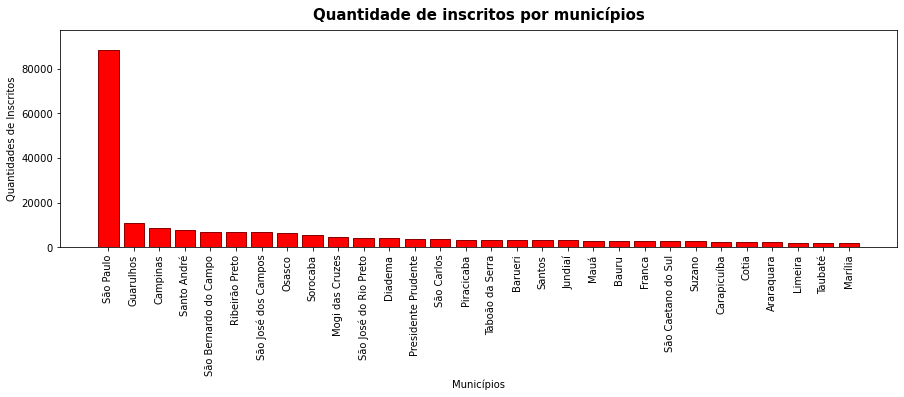

In [5]:
# Quantidade de Inscritos por municípios
quant_insc_muni(enem_20_SP)

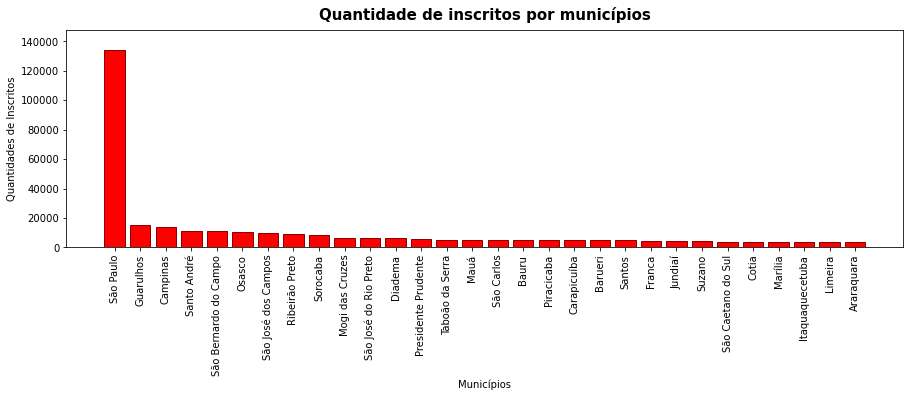

In [6]:
# Quantidade de Inscritos por municípios
quant_insc_muni(enem_19_SP)

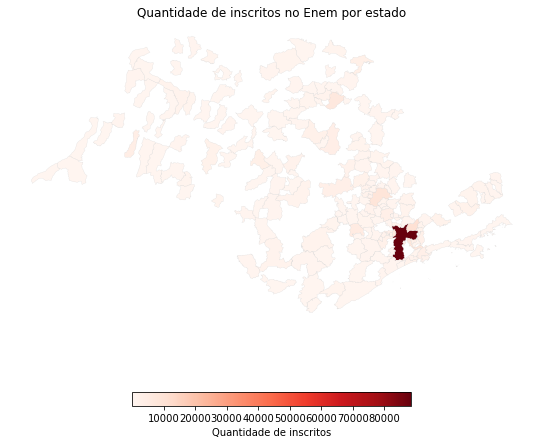

In [4]:
# Calcula a quantidade de inscritos em cada estado (amostra)
# Através dessa análise, podemos concluir que a maria dos inscritos é de São Paulo
inscritos_estado(enem_20_SP)

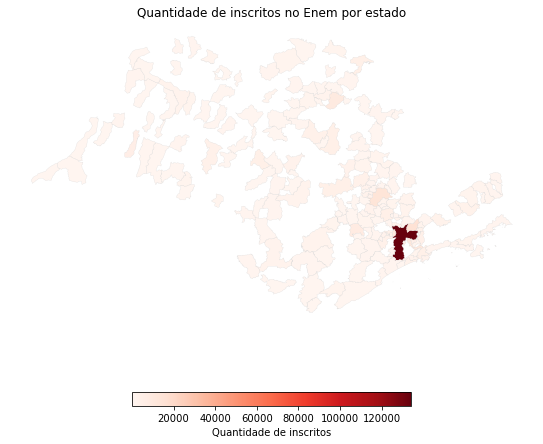

In [5]:
inscritos_estado(enem_19_SP)

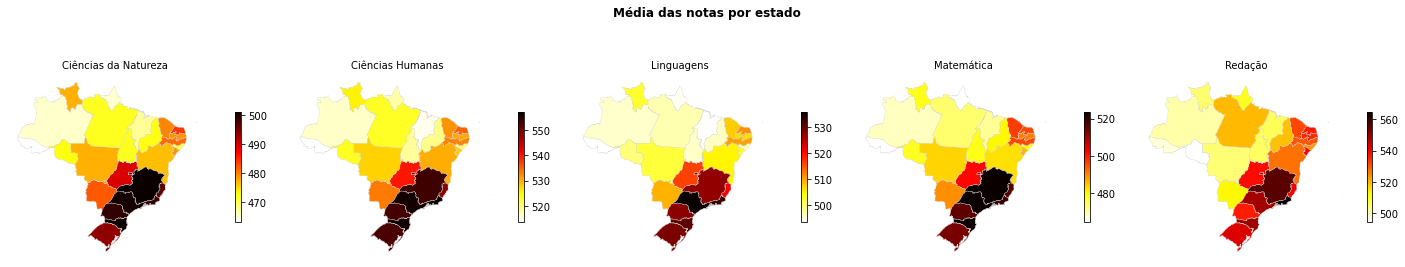

In [4]:
# Calcula a nota média de cada prova por estado
# Através dessa análise, podemos concluir as regiões Sul e Sudeste possuem as maiores notas médias, e a região Norte as menores
plot_mapa_estado(df_15_19, np.mean, 'Média das notas por estado', 'hot_r')

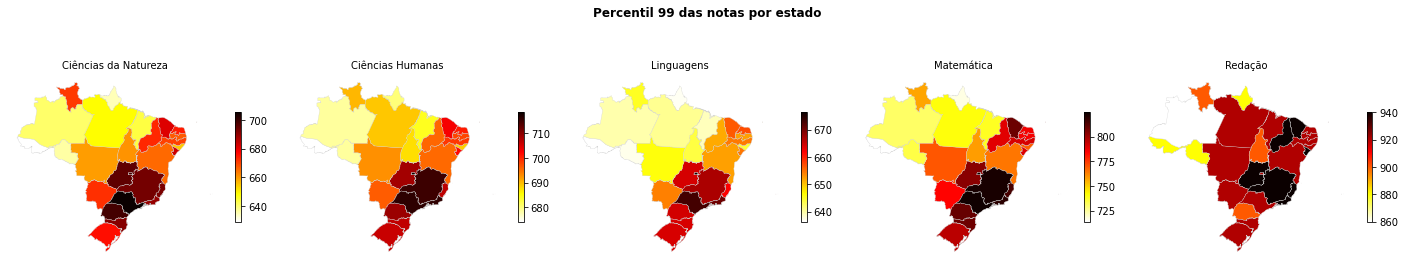

In [6]:
# Calcula a nota percentil 99 de cada prova por estado
# Através dessa análise, podemos concluir a região Sudeste possuem as maiores notas do percentil 99, e a região Norte as menores
# A diferença é ainda mais evidente em Redação, seguida de Ciências Humans e Matemática
# Em Ciências da Natureza, a diferença é aparenta ser mais suave
plot_mapa_estado(df_15_19, percentile(0.99), 'Percentil 99 das notas por estado', 'hot_r')

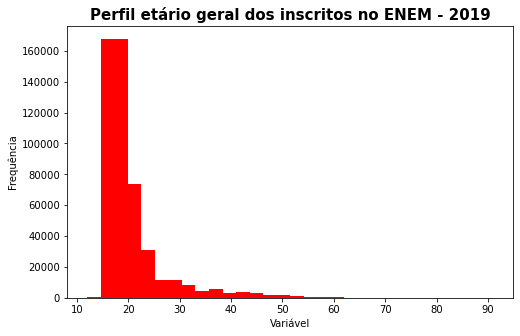

In [231]:
# histograma para o perfil etário dos inscritos
gerar_histograma(enem_19_SP, 'Idade',
                 titulo = 'Perfil etário geral dos inscritos no ENEM - 2019')

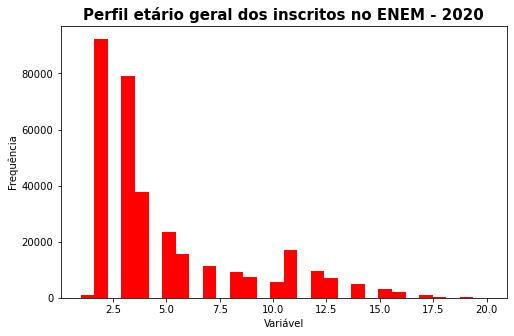

In [232]:
# histograma para o perfil etário dos inscritos
gerar_histograma(enem_20_SP, 'Idade',
                 titulo = 'Perfil etário geral dos inscritos no ENEM - 2020')

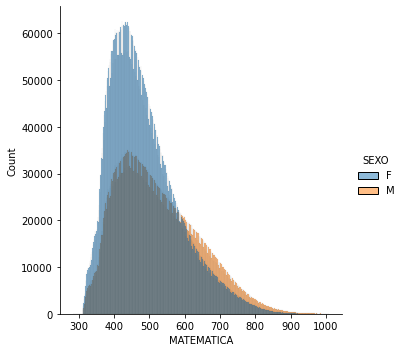

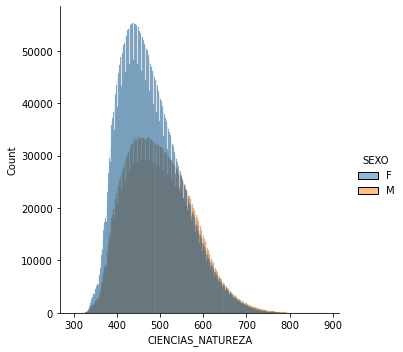

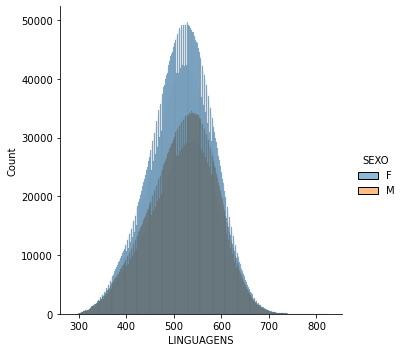

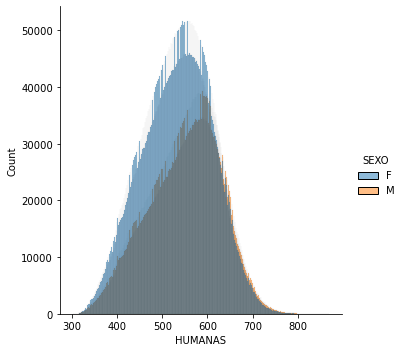

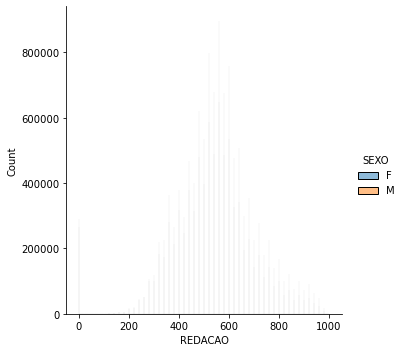

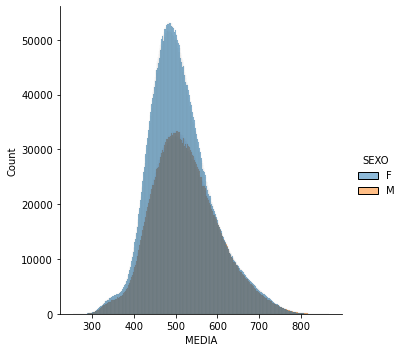

In [11]:
provas = ['MATEMATICA','CIENCIAS_NATUREZA', 'LINGUAGENS', 'HUMANAS','REDACAO']
for prova in provas+['MEDIA']:
    sns.displot(data = df_15_19, x = prova, hue = 'SEXO')

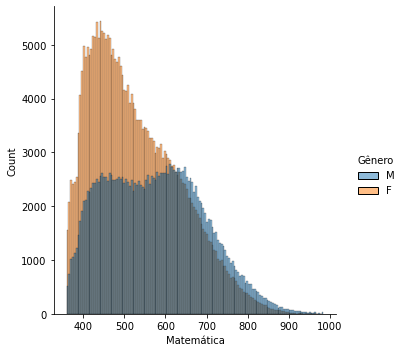

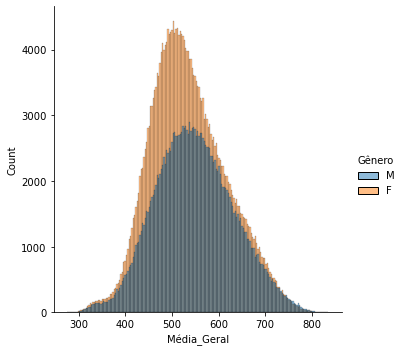

In [14]:
provas = ['Matemática']
for prova in provas+['Média_Geral']:
    sns.displot(data = enem_19_SP, x = prova, hue = 'Gênero')

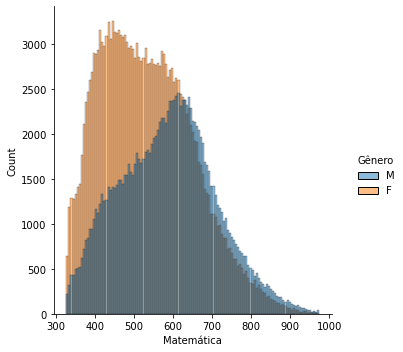

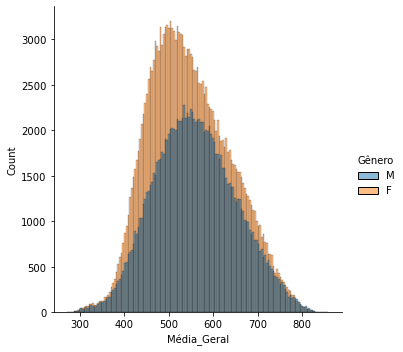

In [15]:
provas = ['Matemática']
for prova in provas+['Média_Geral']:
    sns.displot(data = enem_20_SP, x = prova, hue = 'Gênero')

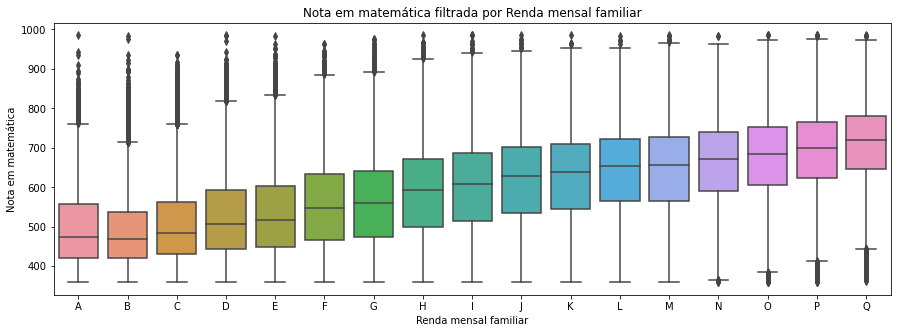

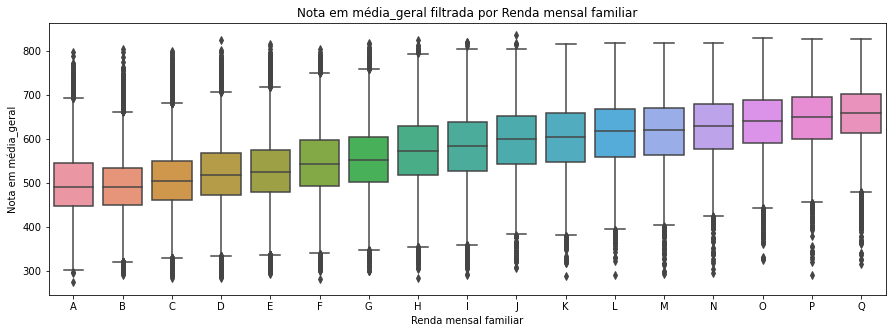

In [4]:
renda_ordenada = np.array(['E', 'G', 'B', 'F', 'C', 'D', 'A', 'J', 'I', 'K', 'H', 'O', 'Q',
       'M', 'P', 'L', 'N'])
renda_ordenada.sort()
boxplot_por_filtro(enem_19_SP, 'Renda_mensal_familiar', renda_ordenada)

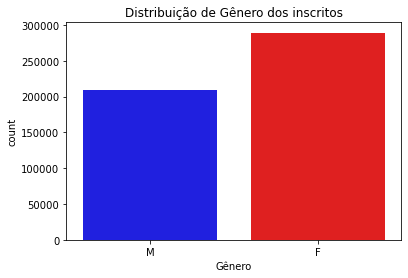

In [5]:
# Quantidade de inscritos por gênero
sns.countplot(x='Gênero', data=enem_19_SP, palette = ('b', 'r'))
plt.title('Distribuição de Gênero dos inscritos');

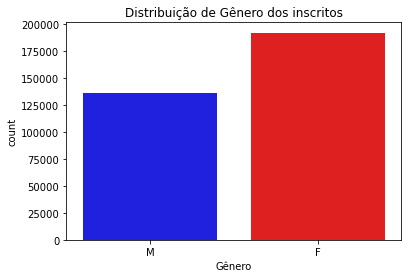

In [7]:
# Quantidade de inscritos por gênero
sns.countplot(x='Gênero', data=enem_20_SP, palette = ('b', 'r'))
plt.title('Distribuição de Gênero dos inscritos');

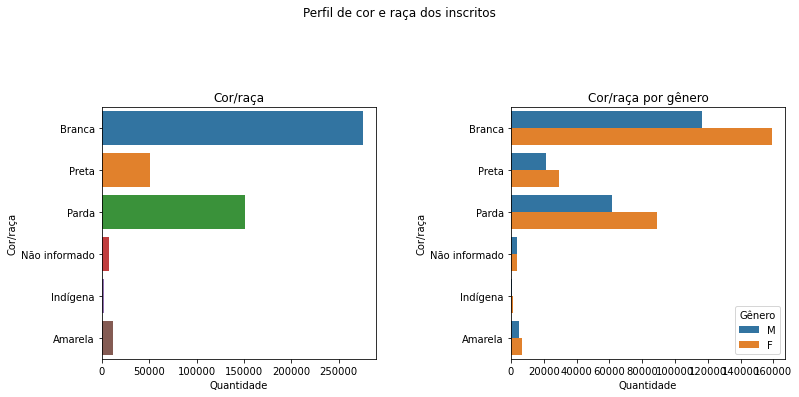

In [10]:
# Cor da pele
enem_19_SP['map_cor'] = enem_19_SP['Cor'].apply(map_cor)
gerar_painel_barra(enem_19_SP, 'map_cor', 'Gênero', 
                   title = 'Perfil de cor e raça dos inscritos',
                   title_subplot_1 = 'Cor/raça',
                   title_subplot_2 = 'Cor/raça por gênero',
                   legend_subplot_2 = 'Gênero',
                   ylabel = 'Cor/raça')

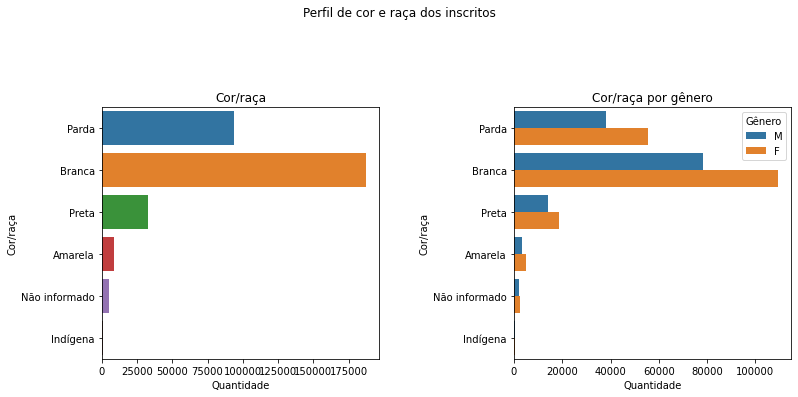

In [14]:
# Cor da pele
enem_20_SP['map_cor'] = enem_20_SP['Cor'].apply(map_cor)
gerar_painel_barra(enem_20_SP, 'map_cor', 'Gênero', 
                   title = 'Perfil de cor e raça dos inscritos',
                   title_subplot_1 = 'Cor/raça',
                   title_subplot_2 = 'Cor/raça por gênero',
                   legend_subplot_2 = 'Gênero',
                   ylabel = 'Cor/raça')

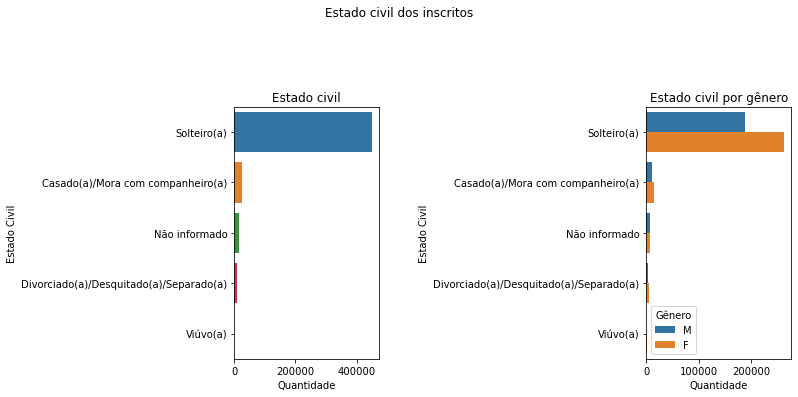

In [4]:
estado_civil(enem_19_SP)

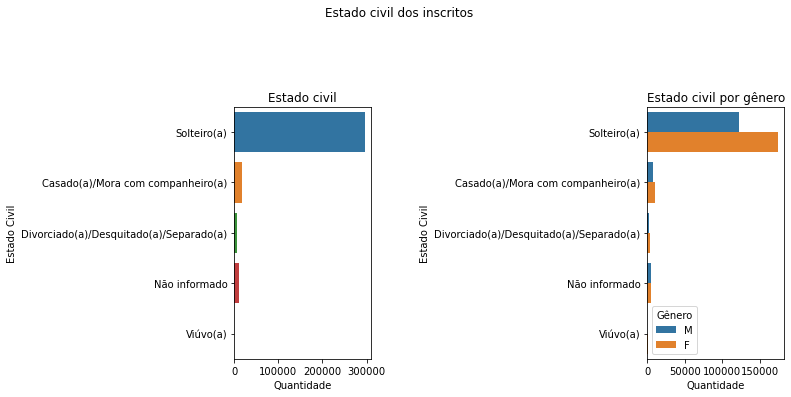

In [6]:
estado_civil(enem_20_SP)

<AxesSubplot:xlabel='Tipo_Escola', ylabel='count'>

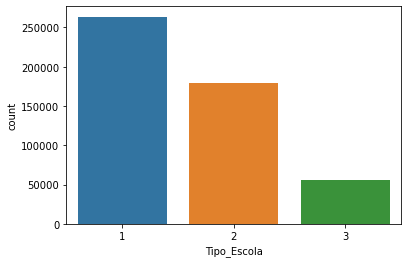

In [171]:
'''DESCOBRIR QUAL O TIPO DE ESCOLA PRA CADA NUMERO
1	Não Respondeu
2	Pública
3	Privada
4	Exterior'''

sns.countplot(x='Tipo_Escola', data=enem_19_SP)

<AxesSubplot:xlabel='Tipo_Escola', ylabel='count'>

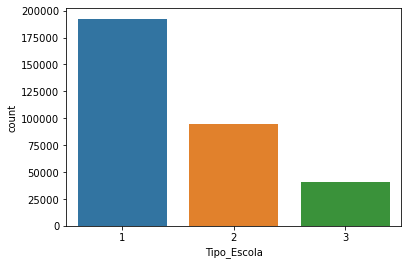

In [172]:
'''DESCOBRIR QUAL O TIPO DE ESCOLA PRA CADA NUMERO
1	Não Respondeu
2	Pública
3	Privada
4	Exterior'''

sns.countplot(x='Tipo_Escola', data=enem_20_SP)

In [ ]:
brancos = df_19_15.query("COR == 1 and MATEMATICA == MATEMATICA")['MATEMATICA']
pretos = df_19_15.query("COR == 2 and MATEMATICA == MATEMATICA")['MATEMATICA']
stats.ks_2samp(brancos, pretos)

Nota média em matemática de inscritos brancos: 528.16
Nota média em matemática de inscritos pretos: 479.74
Percentil 99 da nota em matemática de inscritos brancos: 830.9
Percentil 99 da nota em matemática de inscritos pretos: 739.8
Kolmogorov-Smirnov test: KstestResult(statistic=0.17598135504145962, pvalue=0.0)


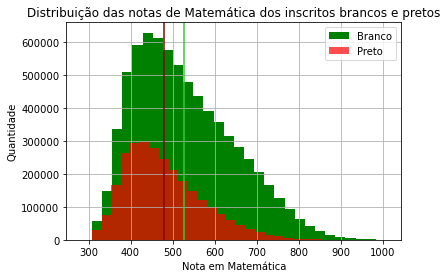

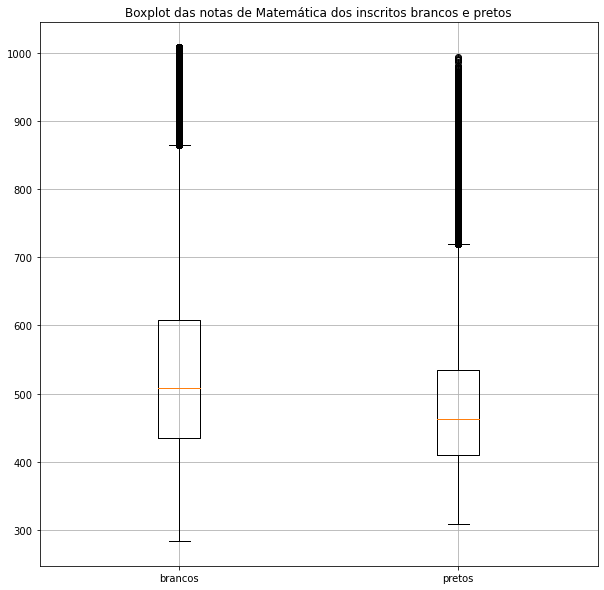

In [246]:
cor_nota(df_15_19)

In [32]:
enem_19_SP.head()

,Inscrição,Ano,Município_Residencia,UF_Residência,Idade,Gênero,Estado_Civil,Cor,Nacionalidade,Município_Nascimento,UF_Nascimento,Ensino_Médio_Concluido,Ano_Conclusão,Tipo_Escola,Município_Prova,UF_Prova,Ciências_Natureza,Ciências Humanas,Linguagem e Códigos,Matemática,Lingua_Estrangeira,Redação,Escolaridade_pai,Escolaridade_mae,Ocupacao_pai,Ocupacao_mae,Pessoas_residencia,Renda_mensal_familiar,Empregada_domestica,Quantidade_banheiros,Quantidade_quartos,Quantidade_carros,Quantidade_moto,Geladeira,Freezer,Maquina_lavar,Maquina_secar,Microondas,Lava_louca,Aspirador_po,TV,DVD,TV_assinatura,Celular,Telefone_fixo,Computador,Internet,Média_Geral
0,190001592266,2019,São Paulo,SP,17.0,1,1,1,1,São Paulo,SP,2,0,2,São Paulo,SP,543.9,548.1,502.5,480.7,0,400.0,4,4,1,1,5,5,0,1,2,1,A,B,B,B,A,B,A,A,B,A,B,C,B,1,1,495.04
1,190001595660,2019,Itaquaquecetuba,SP,17.0,0,1,2,1,São Paulo,SP,2,0,2,Itaquaquecetuba,SP,371.8,501.4,518.6,442.0,1,660.0,4,5,1,3,3,1,0,1,2,0,A,B,B,A,A,A,A,A,A,A,A,D,A,0,1,498.76
2,190001595662,2019,Taboão da Serra,SP,22.0,0,1,2,1,Taboão da Serra,SP,4,0,1,Taboão da Serra,SP,478.1,455.7,530.5,432.1,0,300.0,2,3,2,1,3,1,0,1,0,0,B,B,A,A,A,A,A,A,B,A,A,C,A,0,0,439.28
3,190001595665,2019,Diadema,SP,19.0,0,1,1,1,Diadema,SP,1,2,1,Diadema,SP,587.9,595.9,563.7,533.6,0,620.0,6,4,3,3,4,6,0,1,2,1,A,B,B,B,A,A,A,A,C,A,A,D,A,1,1,580.22
4,190001595666,2019,Itapevi,SP,24.0,0,1,1,1,Cotia,SP,1,7,1,Itapevi,SP,472.7,590.1,563.4,444.8,0,760.0,4,5,3,3,3,3,0,1,2,1,A,B,B,B,A,B,A,A,C,B,A,D,A,0,1,566.20


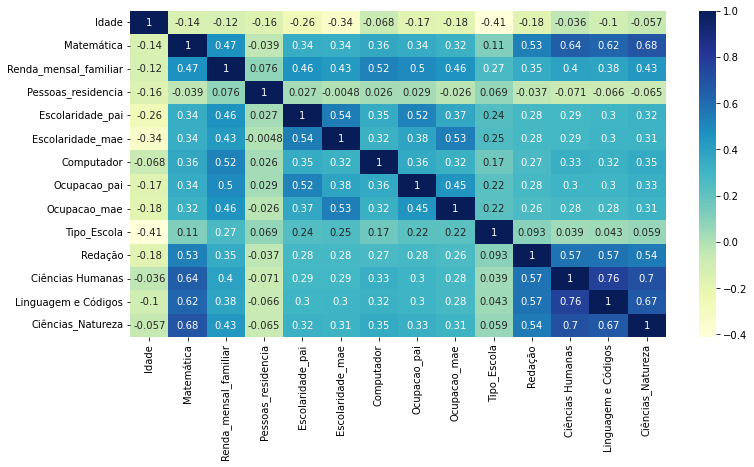

In [33]:
# Correlação entre as notas das provas do Enem
fig, ax = plt.subplots(figsize = (12, 6))
lista_targets = ['Idade','Matemática','Renda_mensal_familiar', 'Pessoas_residencia', 'Escolaridade_pai', 
                 'Escolaridade_mae', 'Computador', 'Ocupacao_pai', 'Ocupacao_mae', 'Tipo_Escola',
                 'Redação','Ciências Humanas','Linguagem e Códigos','Ciências_Natureza']
corr_provas = enem_19_SP[lista_targets].corr(method ='pearson')
sns.heatmap(corr_provas, annot=True, cmap = 'YlGnBu', ax = ax);

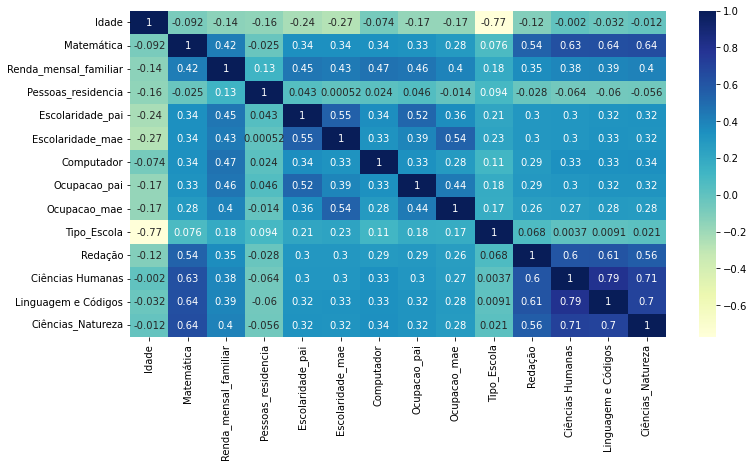

In [34]:
# Correlação entre as notas das provas do Enem
fig, ax = plt.subplots(figsize = (12, 6))
lista_targets = ['Idade','Matemática','Renda_mensal_familiar', 'Pessoas_residencia', 'Escolaridade_pai', 
                 'Escolaridade_mae', 'Computador', 'Ocupacao_pai', 'Ocupacao_mae', 'Tipo_Escola',
                 'Redação','Ciências Humanas','Linguagem e Códigos','Ciências_Natureza']
corr_provas = enem_19_SP[lista_targets].corr(method ='spearman')
sns.heatmap(corr_provas, annot=True, cmap = 'YlGnBu', ax = ax);

# Etapa 4 - Modelagem

## Feature Engenering

In [351]:
#Carregando os dados
enem_19_SP = pd.read_csv('enem_19_SP.csv', encoding = "utf-8", sep = ',')
enem_20_SP = pd.read_csv('enem_20_SP.csv', encoding = "utf-8", sep = ',')

In [281]:
print(enem_19_SP.shape)
enem_19_SP.head(2)

(498188, 48)


,Inscrição,Ano,Município_Residencia,UF_Residência,Idade,Gênero,Estado_Civil,Cor,Nacionalidade,Município_Nascimento,UF_Nascimento,Ensino_Médio_Concluido,Ano_Conclusão,Tipo_Escola,Município_Prova,UF_Prova,Ciências_Natureza,Ciências Humanas,Linguagem e Códigos,Matemática,Lingua_Estrangeira,Redação,Escolaridade_pai,Escolaridade_mae,Ocupacao_pai,Ocupacao_mae,Pessoas_residencia,Renda_mensal_familiar,Empregada_domestica,Quantidade_banheiros,Quantidade_quartos,Quantidade_carros,Quantidade_moto,Geladeira,Freezer,Maquina_lavar,Maquina_secar,Microondas,Lava_louca,Aspirador_po,TV,DVD,TV_assinatura,Celular,Telefone_fixo,Computador,Internet,Média_Geral
0,190001592266,2019,São Paulo,SP,17.0,1,1,1,1,São Paulo,SP,2,0,2,São Paulo,SP,543.9,548.1,502.5,480.7,0,400.0,4,4,1,1,5,5,0,1,2,1,A,B,B,B,A,B,A,A,B,A,B,C,B,1,1,495.04
1,190001595660,2019,Itaquaquecetuba,SP,17.0,0,1,2,1,São Paulo,SP,2,0,2,Itaquaquecetuba,SP,371.8,501.4,518.6,442.0,1,660.0,4,5,1,3,3,1,0,1,2,0,A,B,B,A,A,A,A,A,A,A,A,D,A,0,1,498.76


In [360]:
print(enem_20_SP.shape)
enem_20_SP.head(3)

(321242, 44)


,Inscricao,Ano,Idade,Gênero,Estado_Civil,Cor,Nacionalidade,Ensino_Médio_Concluido,Ano_Conclusão,Tipo_Escola,Município_Prova,UF_Prova,Ciências_Natureza,Ciências Humanas,Linguagem e Códigos,Matemática,Lingua_Estrangeira,Redação,Escolaridade_pai,Escolaridade_mae,Ocupacao_pai,Ocupacao_mae,Pessoas_residencia,Renda_mensal_familiar,Empregada_domestica,Quantidade_banheiros,Quantidade_quartos,Quantidade_carros,Quantidade_moto,Geladeira,Freezer,Maquina_lavar,Maquina_secar,Microondas,Lava_louca,Aspirador_po,TV,DVD,TV_assinatura,Celular,Telefone_fixo,Computador,Internet,Média_Geral
2,200005044037,2020,5,0,2,2,1,1,2,1,Bragança Paulista,SP,488.0,588.9,525.9,542.8,0,700.0,1,3,3,3,2.0,0,0,1,1,0,A,B,A,B,A,A,A,A,A,A,A,C,A,0,1,569.12
3,200003154344,2020,5,0,1,3,1,1,3,1,Mogi das Cruzes,SP,378.1,537.4,549.2,441.8,0,600.0,1,1,1,1,4.0,2,0,1,2,0,A,B,A,A,A,B,A,A,B,A,B,B,A,1,1,501.30
4,200006314268,2020,13,0,2,3,1,1,0,1,Campinas,SP,459.3,500.2,579.7,492.0,1,0.0,4,4,0,0,4.0,3,0,1,1,0,A,B,A,A,A,A,A,A,B,A,A,C,A,0,0,406.24


In [7]:
enem_20_SP['Ocupacao_mae'].unique()

array([nan, 'D', 'B', 'F', 'A', 'C', 'E'], dtype=object)

In [352]:
# Removendo NaN das questções, representa 2.03% no Enem 2020
print(enem_20_SP.shape)
enem_20_SP.dropna(how = 'any', subset = 'Renda_mensal_familiar', inplace = True)
print(enem_20_SP.shape)

(327900, 44)
(321242, 44)


In [353]:
escolariade = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':0}
grupo_escolaridade = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':0}
renda_familiar = {value:index for index, value in enumerate(np.sort(enem_19_SP['Renda_mensal_familiar'].unique()),start = 0)}
empregada_domestica = {value:index for index, value in enumerate(np.sort(enem_19_SP['Empregada_domestica'].unique()),start = 0)}
quantidade = {value:index for index, value in enumerate(np.sort(enem_19_SP.Quantidade_banheiros.unique()), start = 0)}

print(renda_familiar)
print(empregada_domestica)
print(quantidade)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16}
{'A': 0, 'B': 1, 'C': 2, 'D': 3}
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}


In [354]:
# Masculino = 1; Feminino = 0
enem_19_SP.Gênero = pd.get_dummies(enem_19_SP.Gênero, drop_first = True, prefix = 'Gênero') 
# Internet: 1 para sim e 0 para não
enem_19_SP.Internet = pd.get_dummies(enem_19_SP.Internet, drop_first = True, prefix = 'Internet')

In [355]:
enem_20_SP.Gênero = pd.get_dummies(enem_20_SP.Gênero, drop_first = True, prefix = 'Gênero') 
# Internet: 1 para sim e 0 para não
enem_20_SP.Internet = pd.get_dummies(enem_20_SP.Internet, drop_first = True, prefix = 'Internet')

In [357]:
enem_20_SP['Escolaridade_mae'] = enem_20_SP['Escolaridade_mae'].map(escolariade)
enem_20_SP.Escolaridade_pai = enem_20_SP.Escolaridade_pai.map(escolariade)

enem_20_SP.Ocupacao_pai = enem_20_SP.Ocupacao_pai.map(grupo_escolaridade)
enem_20_SP.Ocupacao_mae = enem_20_SP.Ocupacao_mae.map(grupo_escolaridade)

enem_20_SP.Renda_mensal_familiar = enem_20_SP.Renda_mensal_familiar.map(renda_familiar)

enem_20_SP.Empregada_domestica = enem_20_SP.Empregada_domestica.map(empregada_domestica)

enem_20_SP.Quantidade_banheiros = enem_20_SP.Quantidade_banheiros.map(quantidade)
enem_20_SP.Quantidade_quartos = enem_20_SP.Quantidade_quartos.map(quantidade)
enem_20_SP.Quantidade_carros = enem_20_SP.Quantidade_carros.map(quantidade)
enem_20_SP.Computador = enem_20_SP.Computador.map(quantidade)

enem_20_SP['Escolaridade_mae'] = enem_20_SP['Escolaridade_mae'].map(escolariade)
enem_20_SP.Escolaridade_pai = enem_20_SP.Escolaridade_pai.map(escolariade)

enem_20_SP.Ocupacao_pai = enem_20_SP.Ocupacao_pai.map(grupo_escolaridade)
enem_20_SP.Ocupacao_mae = enem_20_SP.Ocupacao_mae.map(grupo_escolaridade)

enem_20_SP.Renda_mensal_familiar = enem_20_SP.Renda_mensal_familiar.map(renda_familiar)

enem_20_SP.Empregada_domestica = enem_20_SP.Empregada_domestica.map(empregada_domestica)

enem_20_SP.Quantidade_banheiros = enem_20_SP.Quantidade_banheiros.map(quantidade)
enem_20_SP.Quantidade_quartos = enem_20_SP.Quantidade_quartos.map(quantidade)
enem_20_SP.Quantidade_carros = enem_20_SP.Quantidade_carros.map(quantidade)
enem_20_SP.Computador = enem_20_SP.Computador.map(quantidade)

In [20]:
enem_19_SP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498188 entries, 0 to 498187
Data columns (total 48 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Inscrição               int64  
 1   Ano                     int64  
 2   Município_Residencia    object 
 3   UF_Residência           object 
 4   Idade                   float64
 5   Gênero                  uint8  
 6   Estado_Civil            int64  
 7   Cor                     int64  
 8   Nacionalidade           int64  
 9   Município_Nascimento    object 
 10  UF_Nascimento           object 
 11  Ensino_Médio_Concluido  int64  
 12  Ano_Conclusão           int64  
 13  Tipo_Escola             int64  
 14  Município_Prova         object 
 15  UF_Prova                object 
 16  Ciências_Natureza       float64
 17  Ciências Humanas        float64
 18  Linguagem e Códigos     float64
 19  Matemática              float64
 20  Lingua_Estrangeira      int64  
 21  Redação                 float64
 

In [358]:
print(enem_19_SP.isnull().sum())

Inscrição                     0
Ano                           0
Município_Residencia          0
UF_Residência                 0
Idade                        11
Gênero                        0
Estado_Civil                  0
Cor                           0
Nacionalidade                 0
Município_Nascimento      12095
UF_Nascimento             12095
Ensino_Médio_Concluido        0
Ano_Conclusão                 0
Tipo_Escola                   0
Município_Prova               0
UF_Prova                      0
Ciências_Natureza             0
Ciências Humanas              0
Linguagem e Códigos           0
Matemática                    0
Lingua_Estrangeira            0
Redação                       0
Escolaridade_pai              0
Escolaridade_mae              0
Ocupacao_pai                  0
Ocupacao_mae                  0
Pessoas_residencia            0
Renda_mensal_familiar         0
Empregada_domestica           0
Quantidade_banheiros          0
Quantidade_quartos            0
Quantida

In [359]:
print(enem_19_SP.shape)
enem_19_SP.dropna(how = 'any', subset = 'Idade', inplace = True)
print(enem_19_SP.shape)

(498188, 48)
(498177, 48)


In [336]:
features_cols = ['Escolaridade_mae','Escolaridade_pai', 'Gênero', 'Idade', 'Tipo_Escola',
                 'Ocupacao_pai', 'Ocupacao_mae', 'Internet', 'Computador','Quantidade_banheiros',
                 'Quantidade_quartos', 'Quantidade_carros',
                 'Renda_mensal_familiar', 'Empregada_domestica']

lista_vars_explicativas = ['Escolaridade_mae','Escolaridade_pai', 'Gênero', 'Tipo_Escola',
                           'Ocupacao_pai', 'Ocupacao_mae', 'Computador',
                           'Renda_mensal_familiar']

In [290]:
enem_19_SP[features_cols].max()

Escolaridade_mae          1.640764
Escolaridade_pai          1.738495
Gênero                    1.176570
Idade                    10.973836
Tipo_Escola               2.075274
Ocupacao_pai              1.833643
Ocupacao_mae              2.074183
Internet                  0.323151
Computador                3.654614
Quantidade_banheiros      2.889181
Quantidade_quartos        2.283879
Quantidade_carros         4.225375
Renda_mensal_familiar     3.094185
Empregada_domestica       5.067287
dtype: float64

In [369]:
from sklearn.preprocessing import StandardScaler

In [370]:
normalizador = StandardScaler()

In [373]:
enem_20_SP[features_cols] = normalizador.fit_transform(enem_20_SP[features_cols])

In [374]:
enem_20_SP[features_cols].head()

,Escolaridade_mae,Escolaridade_pai,Gênero,Idade,Tipo_Escola,Ocupacao_pai,Ocupacao_mae,Internet,Computador,Quantidade_banheiros,Quantidade_quartos,Quantidade_carros,Renda_mensal_familiar,Empregada_domestica
2,-0.394518,-1.267679,-0.840482,0.015928,-0.764045,0.919189,1.099076,0.265175,-1.137131,-0.72005,-1.616183,-1.132808,-1.279515,-0.277961
3,-1.672458,-1.267679,-0.840482,0.015928,-0.764045,-0.726832,-0.586086,0.265175,-0.037251,-0.72005,-0.330633,-1.132808,-0.744780,-0.277961
4,0.244452,0.468564,-0.840482,2.231879,-0.764045,-1.549842,-1.428668,-3.771092,-1.137131,-0.72005,-1.616183,-1.132808,-0.477413,-0.277961
5,0.244452,-0.110184,1.189793,1.677891,-0.764045,0.096179,-0.586086,0.265175,-1.137131,-0.72005,-1.616183,-1.132808,-0.744780,-0.277961
6,0.244452,-0.110184,1.189793,-0.815054,0.648246,0.096179,-0.586086,0.265175,-1.137131,-0.72005,-0.330633,0.187542,-0.744780,-0.277961


In [375]:
# Exportar para .csv. Sem o index, index=False; 
enem_20_SP.to_csv('enem_20_SP_M.csv', index=False, encoding = "utf-8")
enem_19_SP.to_csv('enem_19_SP_M.csv', index=False, encoding = "utf-8")

In [377]:
#Carregando os dados
enem_19_SP = pd.read_csv('enem_19_SP_M.csv', encoding = "utf-8", sep = ',')
enem_20_SP = pd.read_csv('enem_20_SP_M.csv', encoding = "utf-8", sep = ',')

## Modelo OLS

In [378]:
import statsmodels.api as sm
import scipy.stats

In [379]:
lista_vars_explicativas = ['Escolaridade_mae','Escolaridade_pai', 'Gênero', 'Tipo_Escola',
                           'Ocupacao_pai', 'Ocupacao_mae', 'Computador',
                           'Renda_mensal_familiar']

In [381]:
y = enem_20_SP['Matemática']
X = enem_20_SP[lista_vars_explicativas]
X = sm.add_constant(X)

model = sm.OLS(y,X)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Matemática   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                 1.731e+04
Date:                Mon, 18 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:04:53   Log-Likelihood:            -1.9427e+06
No. Observations:              321242   AIC:                         3.885e+06
Df Residuals:                  321233   BIC:                         3.885e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   556.92

In [383]:
y = enem_19_SP['Matemática']
X = enem_19_SP[lista_vars_explicativas]
X = sm.add_constant(X)

model = sm.OLS(y,X)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Matemática   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                 2.559e+04
Date:                Mon, 18 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:07:29   Log-Likelihood:            -2.9832e+06
No. Observations:              498177   AIC:                         5.966e+06
Df Residuals:                  498168   BIC:                         5.966e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   547.12

## Modelo Lasso, ElasticNet e Ridge

### Modelo Lasso

In [384]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [386]:
#lista_vars_explicativas = ['Escolaridade_mae','Escolaridade_pai', 'Gênero', 'Tipo_Escola',
#                           'Ocupacao_pai', 'Ocupacao_mae', 'Internet', 'Computador','Quantidade_banheiros',
#                           'Quantidade_quartos', 'Quantidade_carros',
#                           'Renda_mensal_familiar', 'Empregada_domestica']

lista_vars_explicativas = ['Escolaridade_mae','Escolaridade_pai', 'Gênero',
                           'Ocupacao_pai', 'Ocupacao_mae', 'Computador', 'Internet',
                           'Renda_mensal_familiar','Quantidade_banheiros',]

In [388]:
target = ['Matemática']

In [410]:
df_train, df_test = train_test_split(enem_20_SP, test_size=0.2, random_state=369)

In [411]:
# treino
X_train = df_train[lista_vars_explicativas]
y_train = df_train[target].copy()
# teste
X_test = df_test[lista_vars_explicativas]
y_test = df_test[target].copy()

In [412]:
lasso = Lasso(alpha=0.01, max_iter = 10000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, max_iter=10000)

In [413]:
lasso.score(X_train, y_train)

0.29633166973860203

In [414]:
y_pred_lasso = lasso.predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(f'r^2 on test data : {round(r2_score_lasso,5)}')

r^2 on test data : 0.29362


In [415]:
# importâncias das variáveis explicativas
print_importancias_lasso(X_train, lasso.coef_)

	Renda_mensal_familiar, 25.574
	Gênero, 20.497
	Computador, 15.373
	Escolaridade_mae, 11.445
	Ocupacao_pai, 8.618
	Escolaridade_pai, 7.721
	Quantidade_banheiros, 6.819
	Ocupacao_mae, 4.860
	Internet, 1.405


In [416]:
def rmse_score(true, pred):
    '''
    rmse score
    '''
    return (sqrt(mean_squared_error(true, pred)))

In [417]:
# Erro de treino
y_pred = lasso.predict(X_train)
erro = rmse_score(y_train, y_pred)
print ('Erro de treino:', erro)

Erro de treino: 102.66269988727484


In [418]:
# Erro de teste
y_pred = lasso.predict(X_test)
erro = rmse_score(y_test, y_pred)
print ('Erro de teste:', erro)

Erro de teste: 103.10821437545059


In [419]:
lasso.predict(X_test)

array([624.60362422, 555.63996332, 650.04918604, ..., 600.26734783,
       476.92980462, 610.90851131])

In [420]:
y_pred.mean()

557.0317024095702

In [421]:
lambdas=[0.0001,0.001,0.01,0.1,0.5,1]

In [422]:
scores = []
lasso = Lasso(alpha=alpha, max_iter = 10000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, max_iter=10000)

In [423]:
score_lasso = lasso.score(X_train, y_train)
score_lasso

0.29633166973860203

In [424]:
# Determinando o score com diferentes lambdas
for i in range(len(lambdas)):
    lasso = Lasso(alpha = lambdas[i])
    lasso.fit(X_train, y_train)
    score = lasso.score(X_train, y_train)
    scores.append(score)

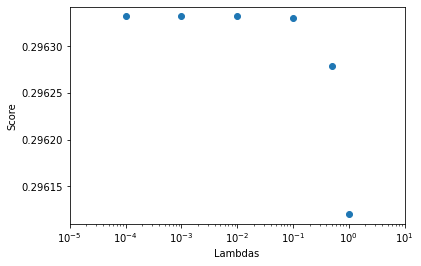

In [425]:
plt.scatter(lambdas,scores);
plt.xlabel('Lambdas');
plt.ylabel('Score');
plt.xscale('log');
plt.xlim([1e-5,10]);

Modelos com lambda a partir de  0.01 apresensou melhor score.

### Modelo Ridge

In [427]:
from sklearn.linear_model import Ridge

In [489]:
df_train, df_test = train_test_split(enem_20_SP, test_size=0.2, random_state=369)

In [490]:
# treino
X_train = df_train[lista_vars_explicativas]
y_train = df_train[target].copy()
# teste
X_test = df_test[lista_vars_explicativas]
y_test = df_test[target].copy()

In [491]:
# Inicialmente alpha = 0.01
ridge_1 = Ridge(alpha = 0.01)
ridge_1.fit(X_train, y_train)

Ridge(alpha=0.01)

In [492]:
score_ridge_1 = ridge_1.score(X_train, y_train)
score_ridge_1

0.29633169051201746

In [493]:
y_pred_ridge_1 = ridge_1.predict(X_test)
r2_score_ridge_1 = r2_score(y_test, y_pred_ridge_1)
print(f'r^2 on test data : {round(r2_score_ridge_1,5)}')

r^2 on test data : 0.29362


In [494]:
# Erro de treino
y_pred = ridge_1.predict(X_train)
erro = rmse_score(y_train, y_pred)
print ('Erro de treino:', erro)

Erro de treino: 102.66269837189122


In [495]:
# Erro de teste
y_pred = ridge_1.predict(X_test)
erro = rmse_score(y_test, y_pred)
print ('Erro de teste:', erro)

Erro de teste: 103.1082538890589


In [496]:
lambdas=[0.0001,0.001,0.01,0.1,0.5,1]

In [497]:
scores = []

In [498]:
# Determinando o score com diferentes lambdas
for i in range(len(lambdas)):
    Ridge_1 = Ridge(alpha = lambdas[i])
    Ridge_1.fit(X_train, y_train)
    score = Ridge_1.score(X_train, y_train)
    scores.append(score)

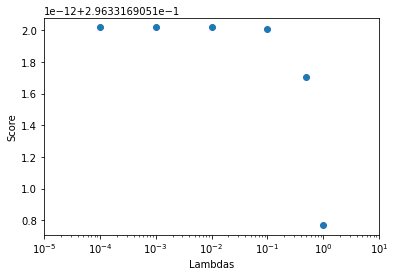

In [499]:
plt.scatter(lambdas,scores);
plt.xlabel('Lambdas');
plt.ylabel('Score');
plt.xscale('log');
plt.xlim([1e-5,10]);
#plt.ylim(0.82,0.822);

Modelos com lambda a partir de  0.01 apresensou melhor score.

In [62]:
y_pred_Ridge_1 = Ridge_1.predict(X_test)
y_pred_Ridge_1

array([[608.13440519],
       [471.38444572],
       [642.32615221],
       ...,
       [590.82940825],
       [547.69259352],
       [598.65362742]])

In [321]:
def print_importancias_Ridge(df, coef):
    '''
    importância das variáveis explicativas do modelo Ridge
    '''
    for e in sorted (list(zip(list(df), coef))):
        print(e[1])
        if e[1].all() != 0:
            print(e[0])
            print('\t{}, {:.3f}'.format(e[0], e[1]))

In [ ]:
print_importancias_Ridge(X_train, Ridge_1.coef_)

### Modelo ElasticNet

In [467]:
from sklearn.linear_model import ElasticNet

In [507]:
df_train, df_test = train_test_split(enem_20_SP, test_size=0.2, random_state=369)

In [508]:
# treino
X_train = df_train[lista_vars_explicativas]
y_train = df_train[target].copy()
# teste
X_test = df_test[lista_vars_explicativas]
y_test = df_test[target].copy()

In [509]:
ElasticNet_1 = ElasticNet(alpha=0.0001, l1_ratio=0.9)
ElasticNet_1.fit(X_train, y_train)

ElasticNet(alpha=0.0001, l1_ratio=0.9)

In [510]:
score_ElasticNet_1 = ElasticNet_1.score(X_train, y_train)
score_ElasticNet_1

0.2963316904982808

In [511]:
y_pred_ElasticNet_1 = ridge_1.predict(X_test)
r2_score_ElasticNet_1 = r2_score(y_test, y_pred_ElasticNet_1)
print(f'r^2 on test data : {round(r2_score_ElasticNet_1,5)}')

r^2 on test data : 0.29362


In [512]:
# Erro de treino
y_pred = ElasticNet_1.predict(X_train)
erro = rmse_score(y_train, y_pred)
print ('Erro de treino:', erro)

Erro de treino: 102.66269837289329


In [513]:
# Erro de teste
y_pred = ElasticNet_1.predict(X_test)
erro = rmse_score(y_test, y_pred)
print ('Erro de teste:', erro)

Erro de teste: 103.10825332832187


In [326]:
# Determinando o score com diferentes lambdas
alphas = [0.0001,0.001,0.01,0.1,0.5,1]
l1s = [0.1,0.2,0.3,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
scores = []

In [328]:
for i in range(len(alphas)):
    for j in range(len(l1s)):
        ElasticNet_1 = ElasticNet(alpha = alphas[i], l1_ratio = l1s[j])
        ElasticNet_1.fit(X_train, y_train)
        score = ElasticNet_1.score(X_train, y_train)
        scores.append(score)
        #print('alpha = ', alphas[i], 'l1_ratio = ', l1s[j],'Score = ', score)

In [68]:
scores.sort(reverse=True)
scores[1]

0.2916358890124211

In [69]:
y_pred_ElasticNet_1 = ElasticNet_1.predict(X_test)
y_pred_ElasticNet_1

array([610.51863447, 473.74834237, 636.45429098, ..., 588.83270737,
       549.38124444, 599.21969919])

In [70]:
score_ElasticNet_1, score_ridge_1, score_lasso

(0.29163588905144366, 0.29163588907320814, 0.2916358515433598)

In [71]:
y_pred_ElasticNet_1, y_pred_Ridge_1, y_pred_lasso

(array([610.51863447, 473.74834237, 636.45429098, ..., 588.83270737,
        549.38124444, 599.21969919]),
 array([[608.13440519],
        [471.38444572],
        [642.32615221],
        ...,
        [590.82940825],
        [547.69259352],
        [598.65362742]]),
 array([608.14325462, 471.39944935, 642.2872839 , ..., 590.81745476,
        547.67197658, 598.67492326]))

## Modelos Em Árvore de Decisão e Floresta Aleatória

In [221]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error

%matplotlib inline

In [186]:
features_cols = ['Escolaridade_mae','Escolaridade_pai', 'Gênero', 'Idade', 'Tipo_Escola',
                 'Ocupacao_pai', 'Ocupacao_mae', 'Internet', 'Computador','Quantidade_banheiros',
                 'Quantidade_quartos', 'Quantidade_carros',
                 'Renda_mensal_familiar', 'Empregada_domestica']

lista_vars_explicativas = ['Escolaridade_mae','Escolaridade_pai', 'Gênero', 'Tipo_Escola',
                           'Ocupacao_pai', 'Ocupacao_mae', 'Computador',
                           'Renda_mensal_familiar']

In [195]:
features_df = enem_19_SP[features_cols]
target = enem_19_SP['Matemática']

#features_df = enem_20_SP[features_cols]
#target = enem_20_SP['Matemática']

In [196]:
X_train, X_test, y_train, y_test = train_test_split(features_df, target, random_state = 369)

In [197]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [198]:
decision_tree.score(X_train, y_train)

0.8617063395429094

In [199]:
decision_tree.score(X_test, y_test)

-0.28403860497247213

In [200]:
y_pred = decision_tree.predict(X_test)
y_pred

array([702.3  , 490.8  , 758.3  , ..., 517.575, 572.6  , 541.55 ])

In [201]:
mean_squared_error(y_test, y_pred)

16919.85450048804

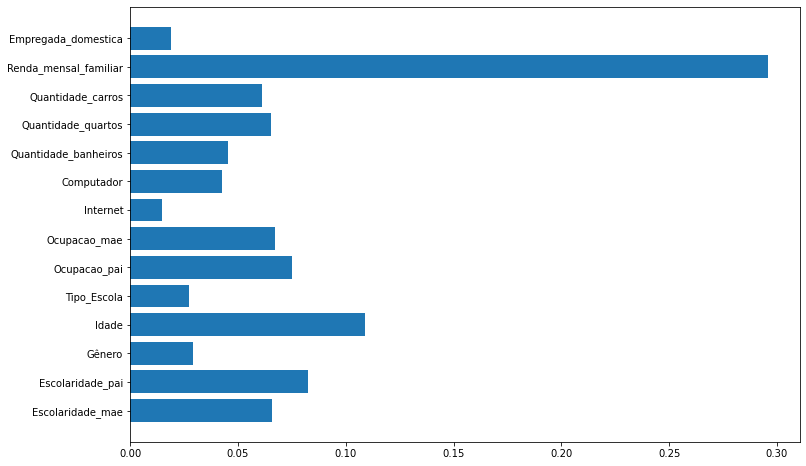

In [202]:
plt.figure(figsize = (12,8))
plt.barh(
    decision_tree.feature_names_in_,
    decision_tree.feature_importances_
);

In [226]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 30).fit(X_train, 
                                                y_train
                                               )
rf_predict = rf.predict(X_test)
rf_predict

array([695.48      , 473.27577778, 693.91944444, ..., 514.61012332,
       525.925     , 541.03083333])

In [220]:
rf_predict

<function ndarray.view>

In [350]:
from sklearn.metrics import r2_score

r2_score(y_train, rf_predict, sample_weight=sample_weight)

NameError: name 'sample_weight' is not defined

In [227]:
y_pred_rf = rf.predict(X_test)
r2_score_rf = r2_score(y_test, y_pred_rf)
print(y_pred_rf)
print(f'r^2 on test data : {round(r2_score_rf,4)}')

[695.48       473.27577778 693.91944444 ... 514.61012332 525.925
 541.03083333]
r^2 on test data : 0.1997


from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators = 10)
model.fit(X_train, y_train)